# Churn Analysis

**Dataset Information:**
Churn data (artificial based on claims similar to real world) from the UCI data repository. A data frame with 5000 observations on the following 18 variables.

In [55]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

Mounting Google Drive to read respective CSV

In [57]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/DBS/CA/ADNM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/DBS/CA/ADNM


**Loading the data file**

In [58]:
churn_base_data = pd.read_csv('churn.csv')

Look at the top 5 records of data

In [59]:
churn_base_data.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [60]:
churn_base_data.shape

(5000, 18)

In [61]:
churn_base_data.columns.values

array(['churn', 'accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls',
       'totalevecharge', 'totalnightminutes', 'totalnightcalls',
       'totalnightcharge', 'totalintlminutes', 'totalintlcalls',
       'totalintlcharge', 'numbercustomerservicecalls'], dtype=object)

In [62]:
# Check the data types of all the columns
churn_base_data.dtypes

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object

**Rename columns to easy readability**

In [63]:
churn_base_data = churn_base_data.rename(columns={
    "accountlength": "account_length",
    "internationalplan": "international_plan",
    "voicemailplan": "voicemail_plan",

    "numbervmailmessages": "number_vmail_messages",

    "totaldayminutes": "total_day_minutes",
    "totaldaycalls": "total_day_calls",
    "totaldaycharge": "total_day_charge",

    "totaleveminutes": "total_eve_minutes",
    "totalevecalls": "total_eve_calls",
    "totalevecharge": "total_eve_charge",

    "totalnightminutes": "total_night_minutes",
    "totalnightcalls": "total_night_calls",
    "totalnightcharge": "total_night_charge",

    "totalintlminutes": "total_intl_minutes",
    "totalintlcalls": "total_intl_calls",
    "totalintlcharge": "total_intl_charge",

    "numbercustomerservicecalls": "number_customer_service_calls"
    })

In [64]:
# Check the descriptive statistics of numeric variables
churn_base_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Insights from exploratory analysis

1. **international_plan** and **voicemail_plan** is actually a categorical hence central tendencies is not displayed in above data because of no use at numerical calculation level
2. **account_length** : On average, customers have been with the company for about 100 months, and the data shows some variation in the account lengths, with a standard deviation of almost 40%.
3. **Charges** : 75% customers have total day chages less than 37 USD, total evening chages less than 20 USD, total night chages less than 10 USD, total international call chages less than 3 USD.
4. **Tenure** : At least 25% customers have stayed as customer for more than 1.5 years

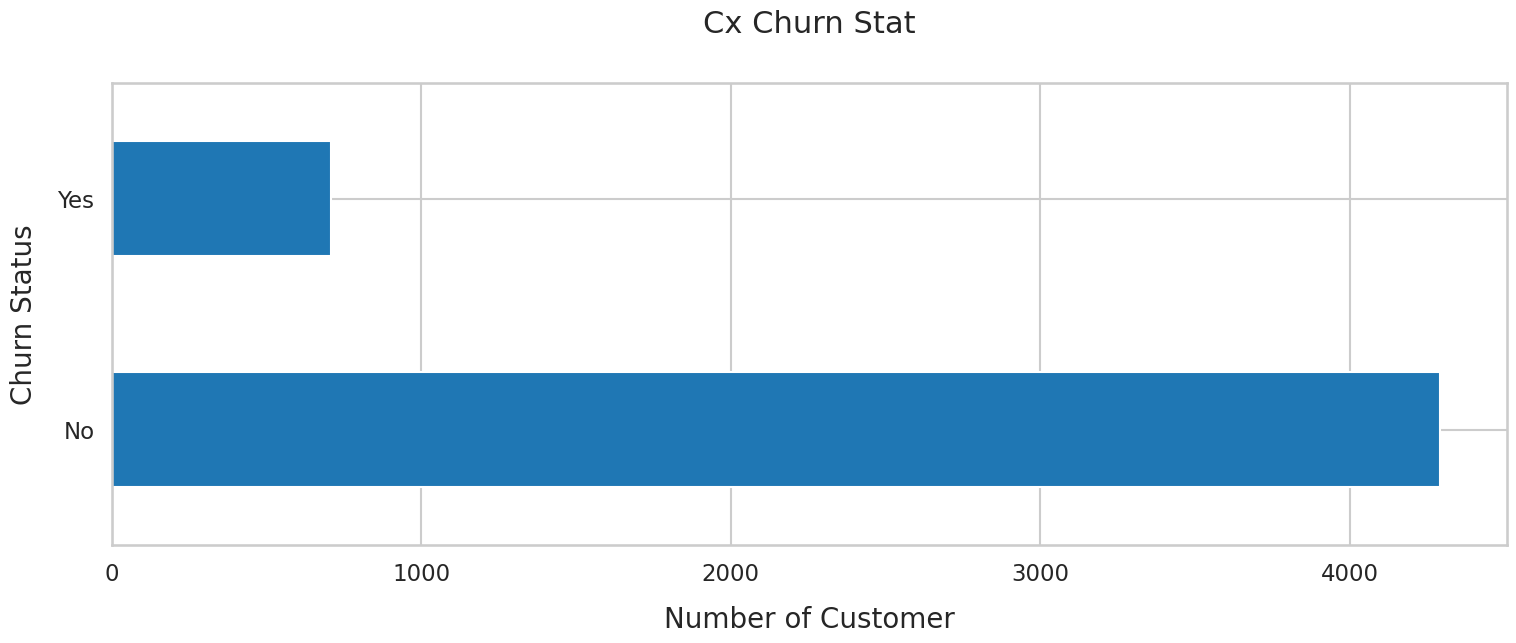

In [65]:
churn_base_data['churn'].value_counts().plot(kind='barh', figsize=(18, 6))
plt.xlabel("Number of Customer", labelpad=14)
plt.ylabel("Churn Status", labelpad=14)
plt.title("Cx Churn Stat", y=1.02);

In [66]:
100 * churn_base_data['churn'].value_counts()/len(churn_base_data['churn'])

No     85.86
Yes    14.14
Name: churn, dtype: float64

In [67]:
churn_base_data['churn'].value_counts()

No     4293
Yes     707
Name: churn, dtype: int64

* Data is highly imbalanced, current churn ratio = 86:14<br>.

> Need to take care during training and testing data. May be the possible solutions to make it balanced dataset are resampling with Random Under Sampling or SMOTE or Random Over Sampling, etc.



In [68]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
churn_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   churn                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   international_plan             5000 non-null   object 
 3   voicemail_plan                 5000 non-null   object 
 4   number_vmail_messages          5000 non-null   int64  
 5   total_day_minutes              5000 non-null   float64
 6   total_day_calls                5000 non-null   int64  
 7   total_day_charge               5000 non-null   float64
 8   total_eve_minutes              5000 non-null   float64
 9   total_eve_calls                5000 non-null   int64  
 10  total_eve_charge               5000 non-null   float64
 11  total_night_minutes            5000 non-null   float64
 12  total_night_calls              5000 non-null   i

                            index    0
0                           churn  0.0
1                  account_length  0.0
2              international_plan  0.0
3                  voicemail_plan  0.0
4           number_vmail_messages  0.0
5               total_day_minutes  0.0
6                 total_day_calls  0.0
7                total_day_charge  0.0
8               total_eve_minutes  0.0
9                 total_eve_calls  0.0
10               total_eve_charge  0.0
11            total_night_minutes  0.0
12              total_night_calls  0.0
13             total_night_charge  0.0
14             total_intl_minutes  0.0
15               total_intl_calls  0.0
16              total_intl_charge  0.0
17  number_customer_service_calls  0.0


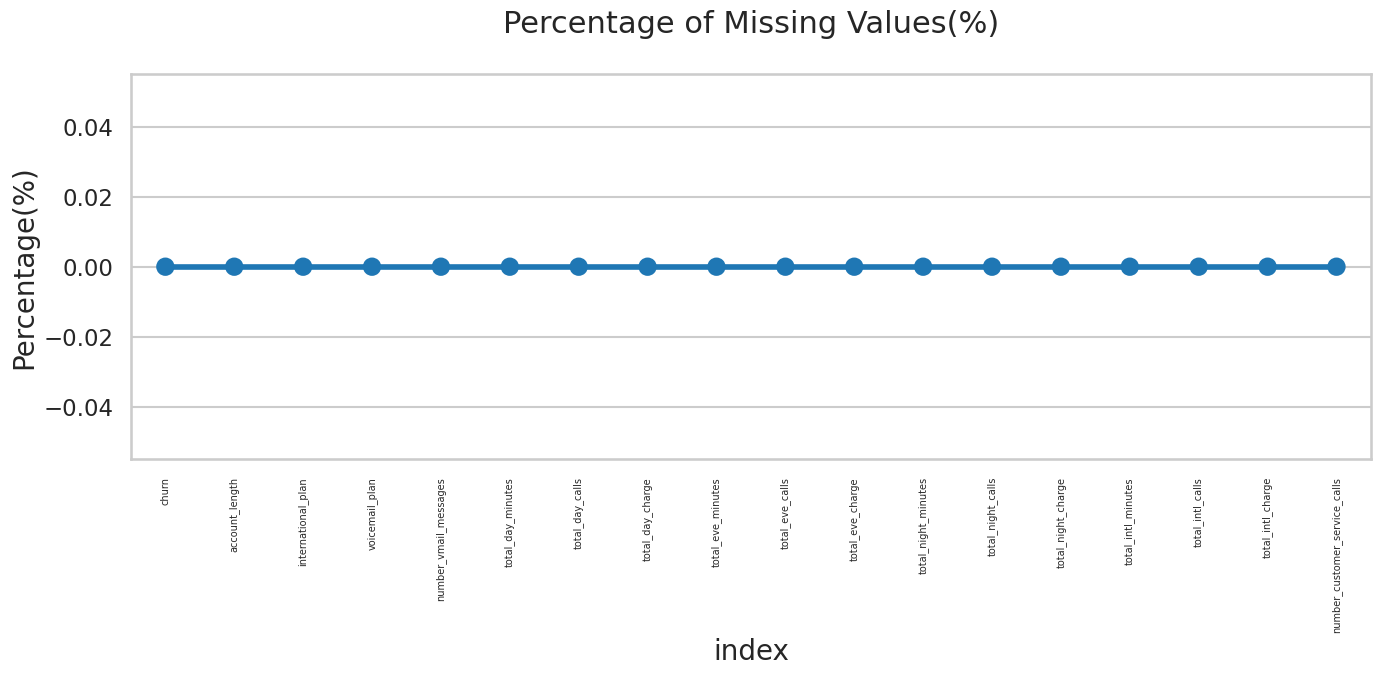

In [69]:
missing = pd.DataFrame((churn_base_data.isnull().sum()) * 100 / churn_base_data.shape[0]).reset_index()
print(missing)
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)  # Use x and y as keyword arguments
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values(%)")
plt.ylabel("Percentage(%)")
plt.show()

### Missing Data

* Here, I don't have any missing data. Thus no need of further clean up or make up.



---
---



## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [70]:
churn_data = churn_base_data.copy()

**2.** Divide customers into bins based on account length e.g. for account length < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

For example `['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72', '73 - 84', '85 - 96', '97 - 108', '109 - 120', '121 - 132', '133 - 144', '145 - 156', '157 - 168', '169 - 180', '181 - 192', '193 - 204', '205 - 216', '217 - 228', '229 - 240', '241 - 252']`


In [71]:
# Get the max tenure
print(churn_data['account_length'].max())

243


In [72]:
# Group the account_length in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 253, 12)]
print(labels)
churn_data['account_length_group'] = pd.cut(churn_data.account_length, range(1, 254, 12), right=False, labels=labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72', '73 - 84', '85 - 96', '97 - 108', '109 - 120', '121 - 132', '133 - 144', '145 - 156', '157 - 168', '169 - 180', '181 - 192', '193 - 204', '205 - 216', '217 - 228', '229 - 240', '241 - 252']


In [73]:
churn_data['account_length_group'].value_counts()

85 - 96      603
97 - 108     594
109 - 120    556
73 - 84      516
121 - 132    489
61 - 72      417
133 - 144    365
49 - 60      310
145 - 156    237
37 - 48      221
157 - 168    189
25 - 36      131
169 - 180    112
13 - 24       88
181 - 192     62
1 - 12        52
193 - 204     31
205 - 216     12
217 - 228     10
229 - 240      4
241 - 252      1
Name: account_length_group, dtype: int64

In [74]:
churn_data.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length_group
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,121 - 132
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,97 - 108
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,133 - 144
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,73 - 84
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,73 - 84


**2.1** To make more sense of data for exploratory analysis, merging charges, call minutes, and calls respectively of Day, Night, Evening and International service/times

In [75]:
churn_data["total_charges"] = round(churn_data["total_day_charge"] + churn_data["total_night_charge"] + churn_data["total_intl_charge"] + churn_data["total_eve_charge"])
churn_data["total_minutes"] = churn_data["total_day_minutes"] + churn_data["total_eve_minutes"] + churn_data["total_night_minutes"] + churn_data["total_intl_minutes"]
churn_data["total_calls"] = churn_data["total_day_calls"] + churn_data["total_eve_calls"] + churn_data["total_night_calls"] + churn_data["total_intl_calls"] + churn_data["number_customer_service_calls"]
churn_data.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length_group,total_charges,total_minutes,total_calls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,121 - 132,76.0,717.2,304
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,97 - 108,59.0,625.2,333
2,No,137,no,no,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,133 - 144,62.0,539.4,333
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,73 - 84,67.0,564.8,257
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,73 - 84,52.0,512.0,362


In [76]:
# Group the total_charges in bins of quarters
labels = ["{0} - {1}".format(i, i + 25) for i in range(0, 100, 25)]
print(labels)
churn_data['total_charges_group'] = pd.cut(churn_data.total_charges, range(1, 125, 25), right=False, labels=labels)
churn_data.describe()

['0 - 25', '25 - 50', '50 - 75', '75 - 100']


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_charges,total_minutes,total_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,59.490800,591.578860,306.145200
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,10.353654,89.071881,34.333737
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,284.300000,192.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,52.000000,531.200000,283.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,60.000000,592.400000,306.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,66.000000,652.025000,329.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,96.000000,885.000000,418.000000


In [77]:
# Group the total_minutes in bins of quarters
churn_data['total_hours'] = round(churn_data['total_minutes'] / 60)

churn_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_charges,total_minutes,total_calls,total_hours
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,59.490800,591.578860,306.145200,9.856600
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,10.353654,89.071881,34.333737,1.515023
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,284.300000,192.000000,5.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,52.000000,531.200000,283.000000,9.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,60.000000,592.400000,306.000000,10.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,66.000000,652.025000,329.000000,11.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,96.000000,885.000000,418.000000,15.000000


In [78]:
# Group the number_vmail_messages in bins of quarters
labels = ["{0} - {1}".format(i, i + 5) for i in range(0, 55, 5)]
print(labels)
churn_data['number_vmail_messages_group'] = pd.cut(churn_data.number_vmail_messages, range(0, 60, 5), right=False, labels=labels)
churn_data.describe()

['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30', '30 - 35', '35 - 40', '40 - 45', '45 - 50', '50 - 55']


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_charges,total_minutes,total_calls,total_hours
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,59.490800,591.578860,306.145200,9.856600
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,10.353654,89.071881,34.333737,1.515023
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,284.300000,192.000000,5.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,52.000000,531.200000,283.000000,9.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,60.000000,592.400000,306.000000,10.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,66.000000,652.025000,329.000000,11.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,96.000000,885.000000,418.000000,15.000000


In [79]:
churn_data.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length_group,total_charges,total_minutes,total_calls,total_charges_group,total_hours,number_vmail_messages_group
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,...,3,2.70,1,121 - 132,76.0,717.2,304,75 - 100,12.0,25 - 30
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,...,3,3.70,1,97 - 108,59.0,625.2,333,50 - 75,10.0,25 - 30
2,No,137,no,no,0,243.4,114,41.38,121.2,110,...,5,3.29,0,133 - 144,62.0,539.4,333,50 - 75,9.0,0 - 5
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,...,7,1.78,2,73 - 84,67.0,564.8,257,50 - 75,9.0,0 - 5
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,...,3,2.73,3,73 - 84,52.0,512.0,362,50 - 75,9.0,0 - 5


**3.** Remove columns not required for processing

In [80]:
# Drop unwanted columns
#churn_data.drop(['account_length','total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'total_minutes', 'number_vmail_messages'], axis='columns', inplace=True, errors='ignore')
churn_data.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length_group,total_charges,total_minutes,total_calls,total_charges_group,total_hours,number_vmail_messages_group
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,...,3,2.70,1,121 - 132,76.0,717.2,304,75 - 100,12.0,25 - 30
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,...,3,3.70,1,97 - 108,59.0,625.2,333,50 - 75,10.0,25 - 30
2,No,137,no,no,0,243.4,114,41.38,121.2,110,...,5,3.29,0,133 - 144,62.0,539.4,333,50 - 75,9.0,0 - 5
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,...,7,1.78,2,73 - 84,67.0,564.8,257,50 - 75,9.0,0 - 5
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,...,3,2.73,3,73 - 84,52.0,512.0,362,50 - 75,9.0,0 - 5


## Data Exploration
**Plot distibution of individual predictors by churn**

### Univariate Analysis

<ipython-input-81-c5c2195bde18>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(26, 5))


<Figure size 640x480 with 0 Axes>

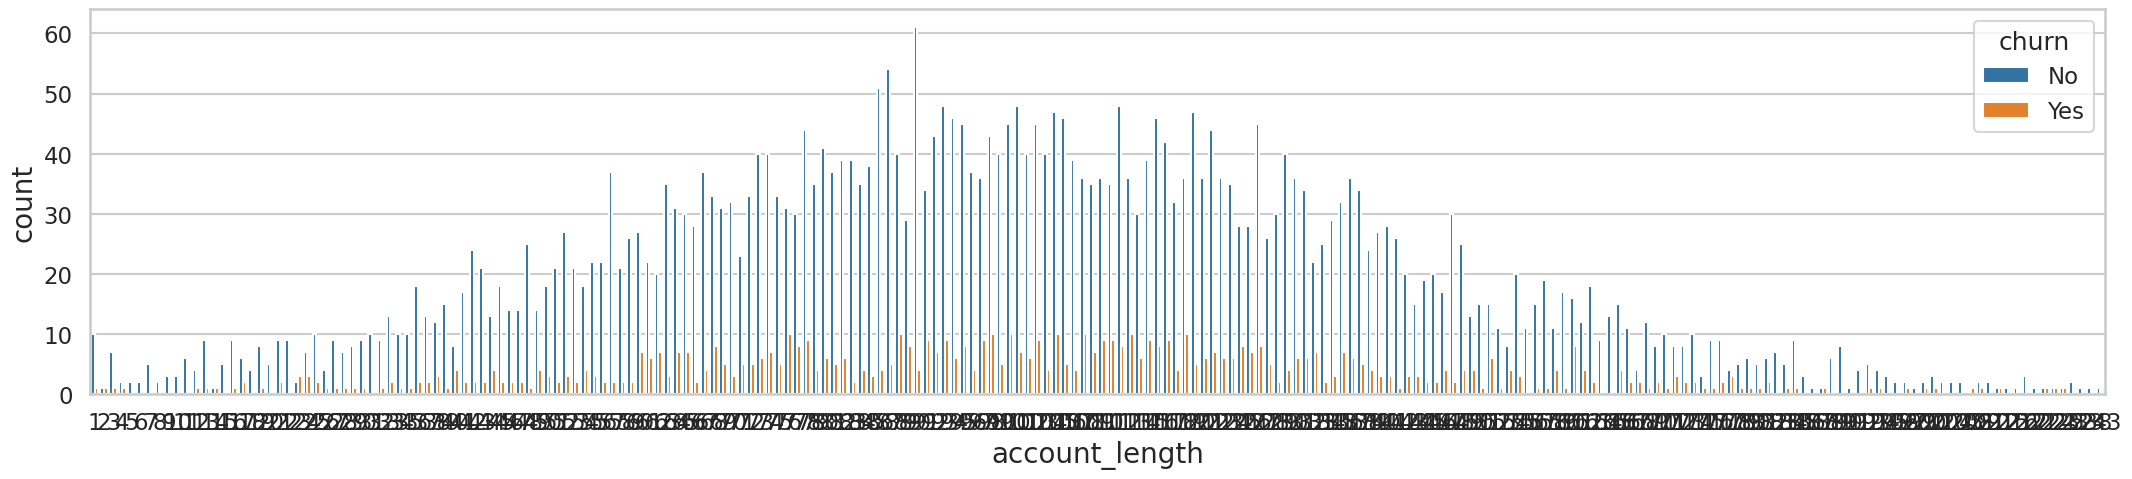

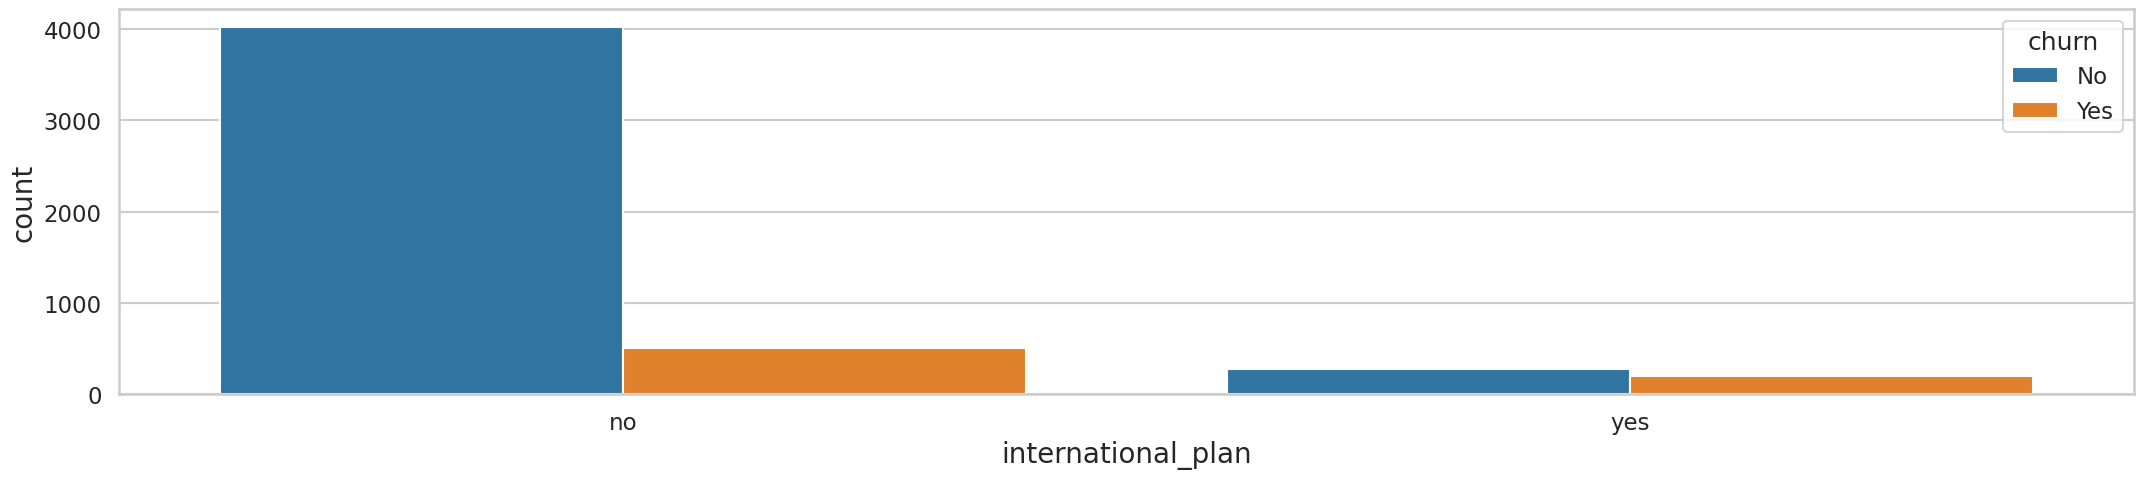

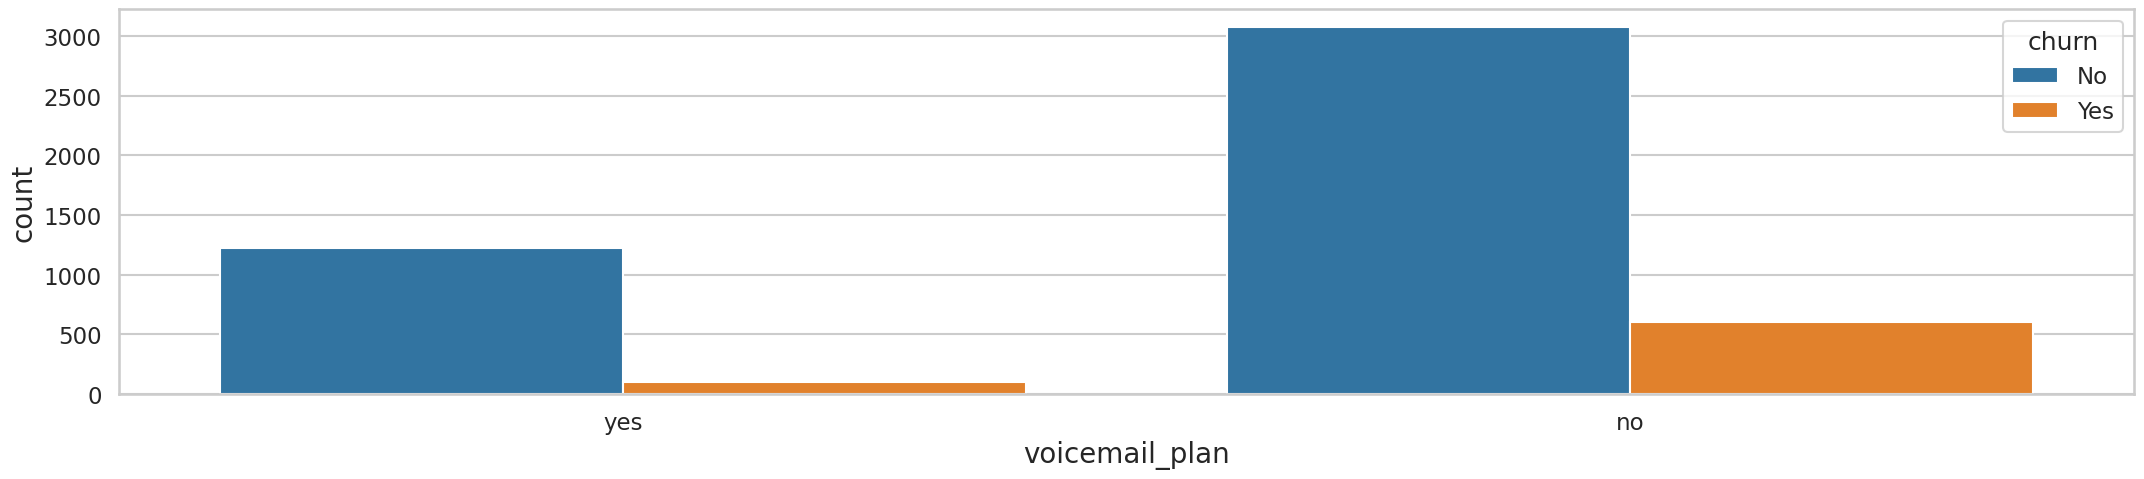

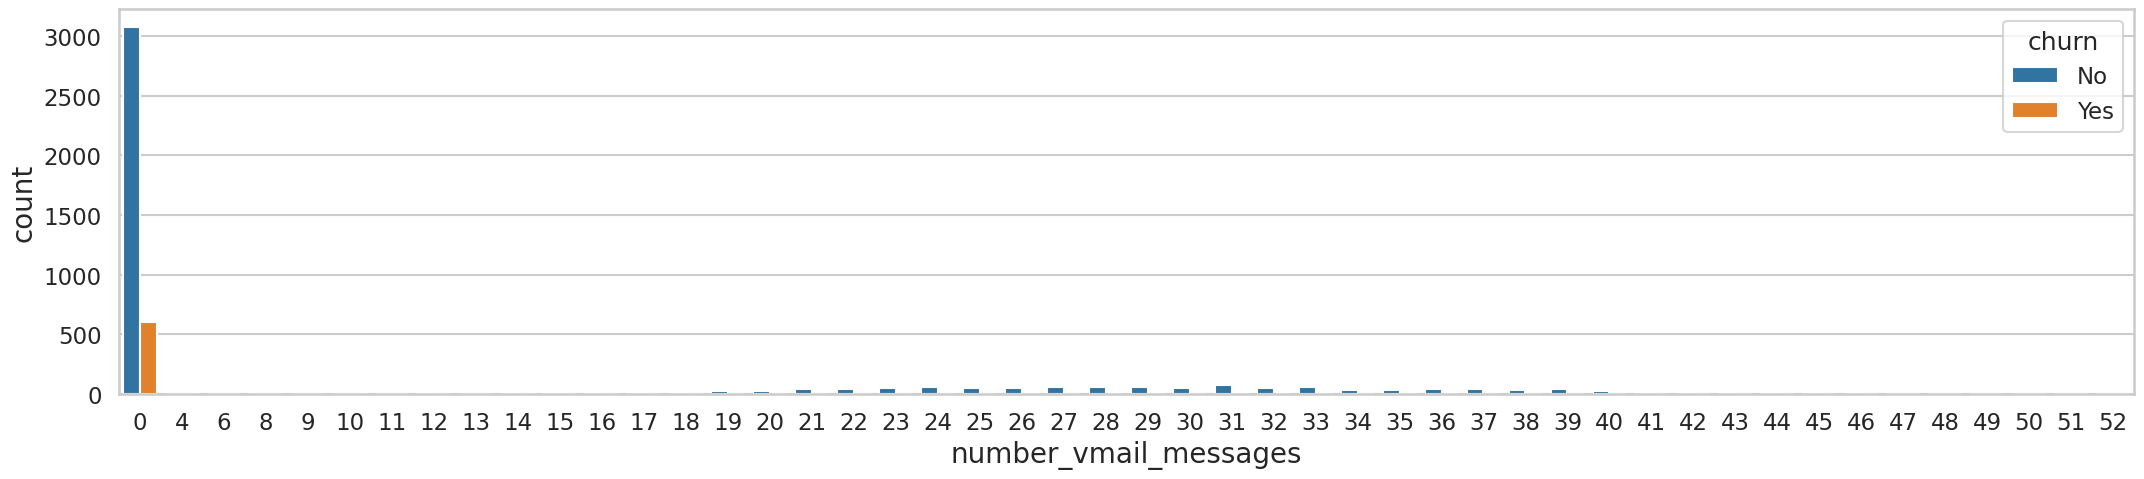

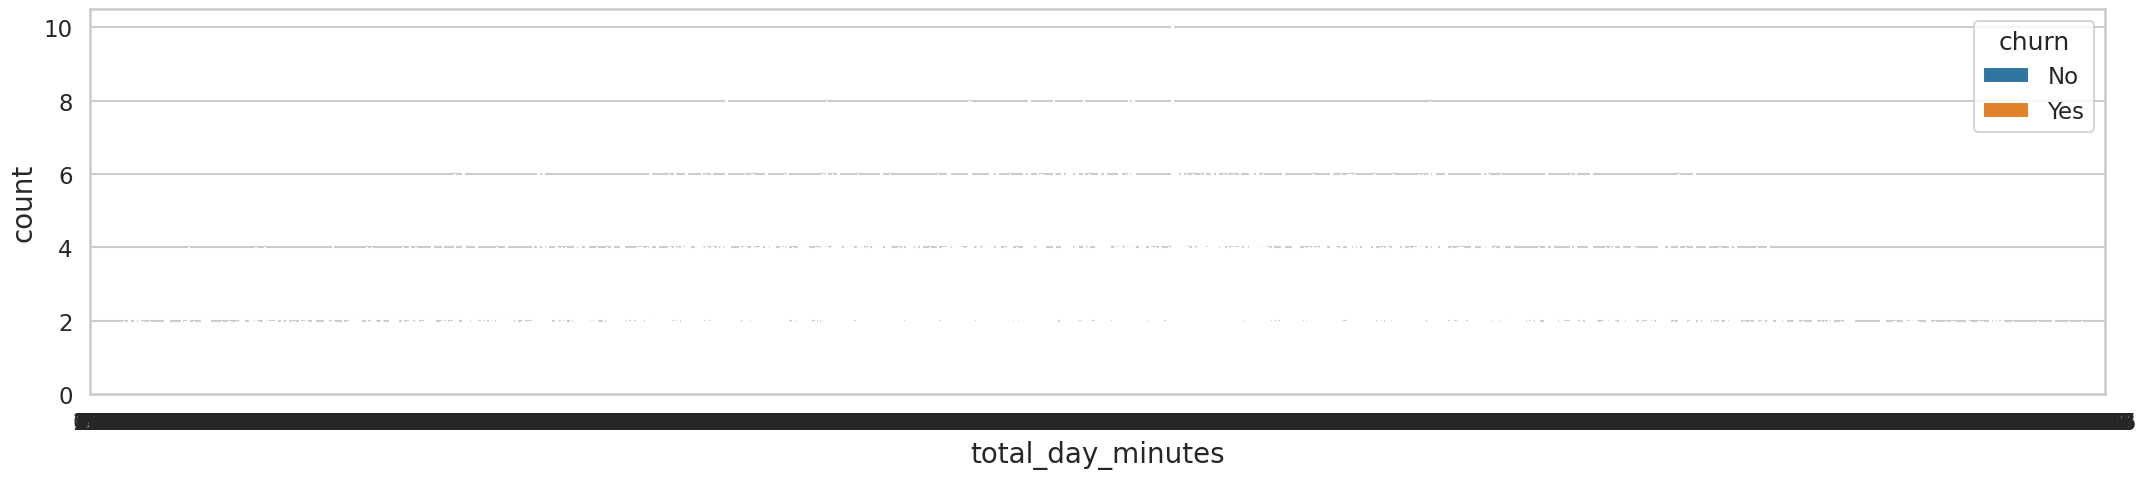

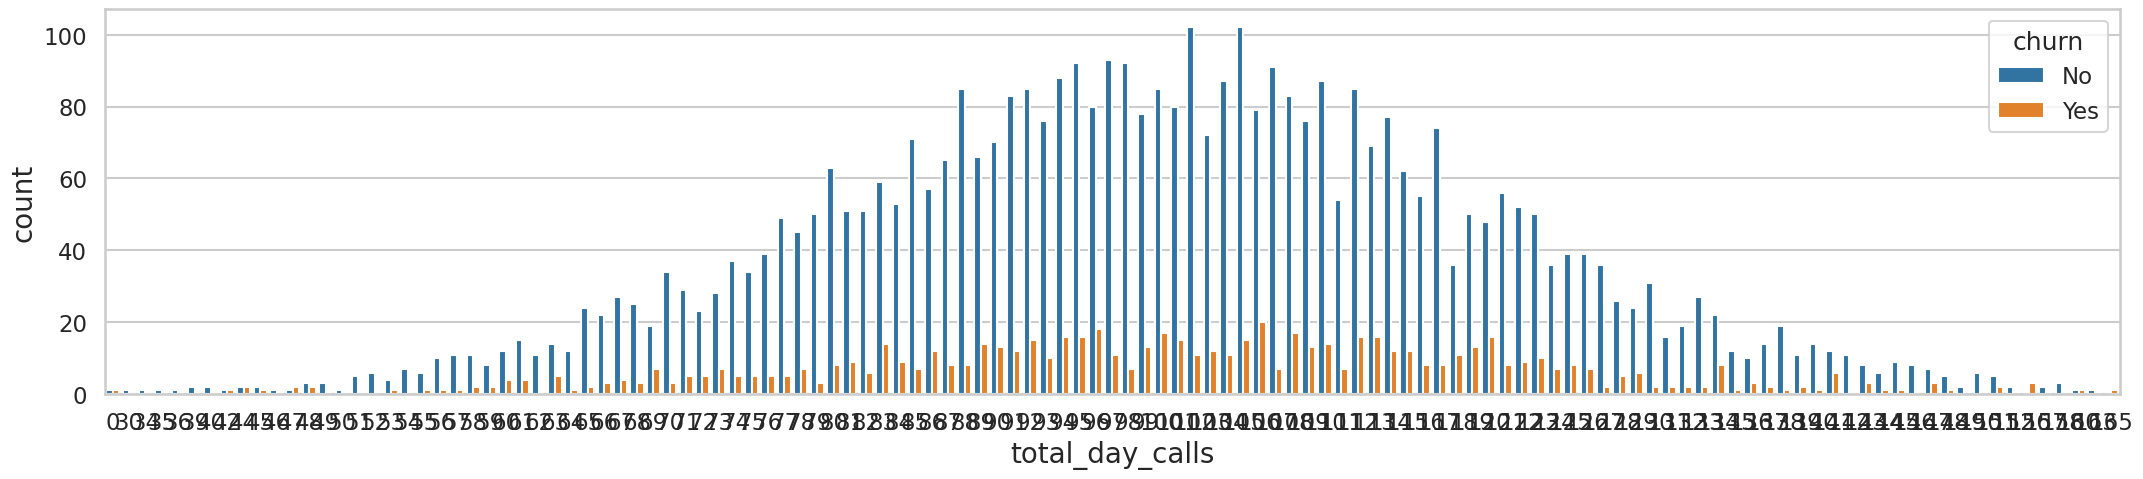

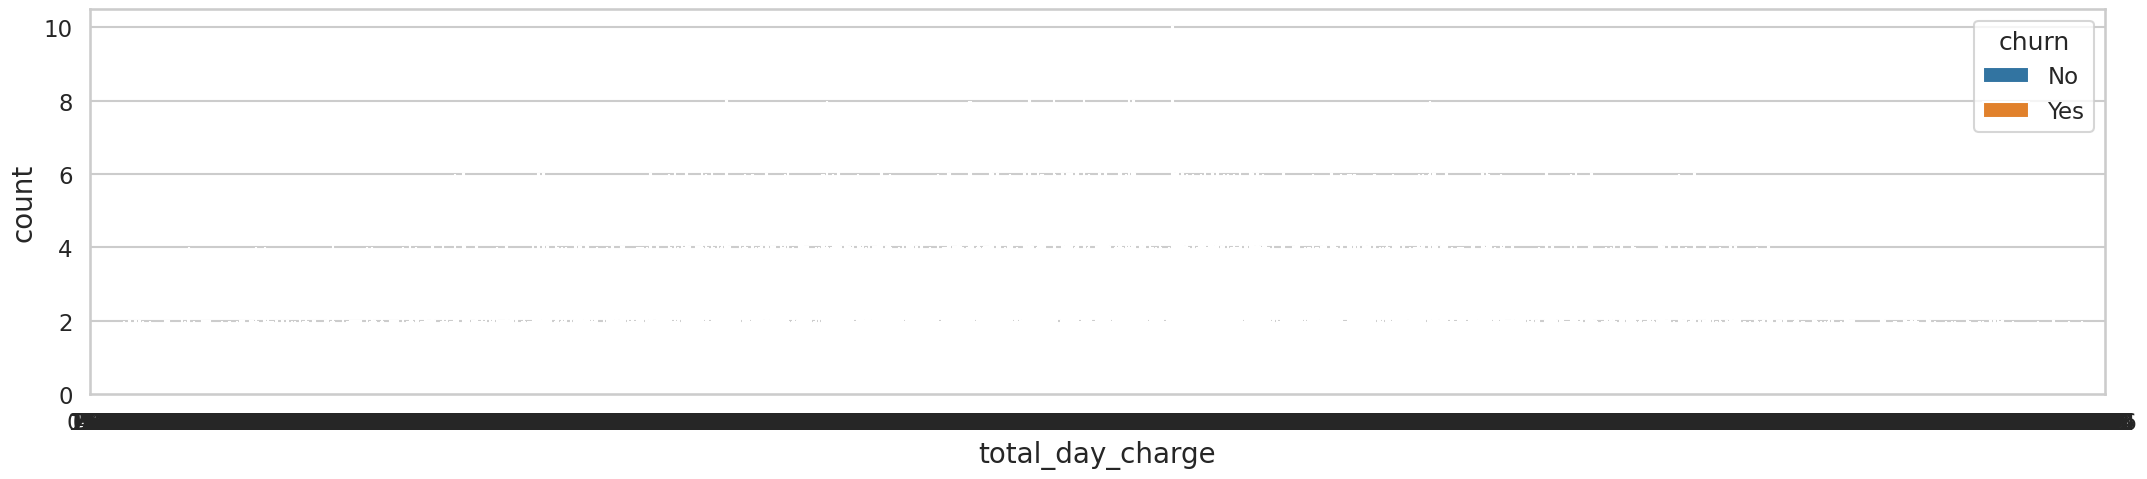

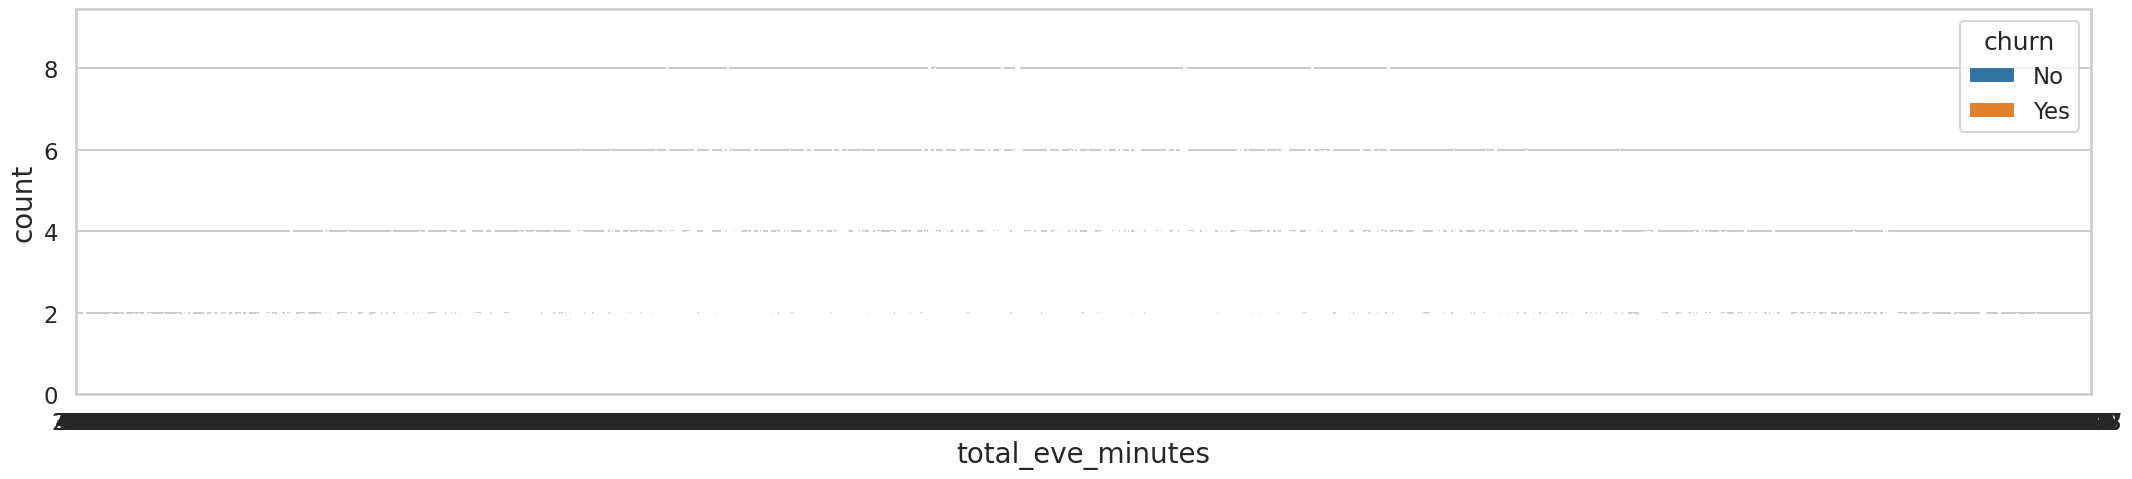

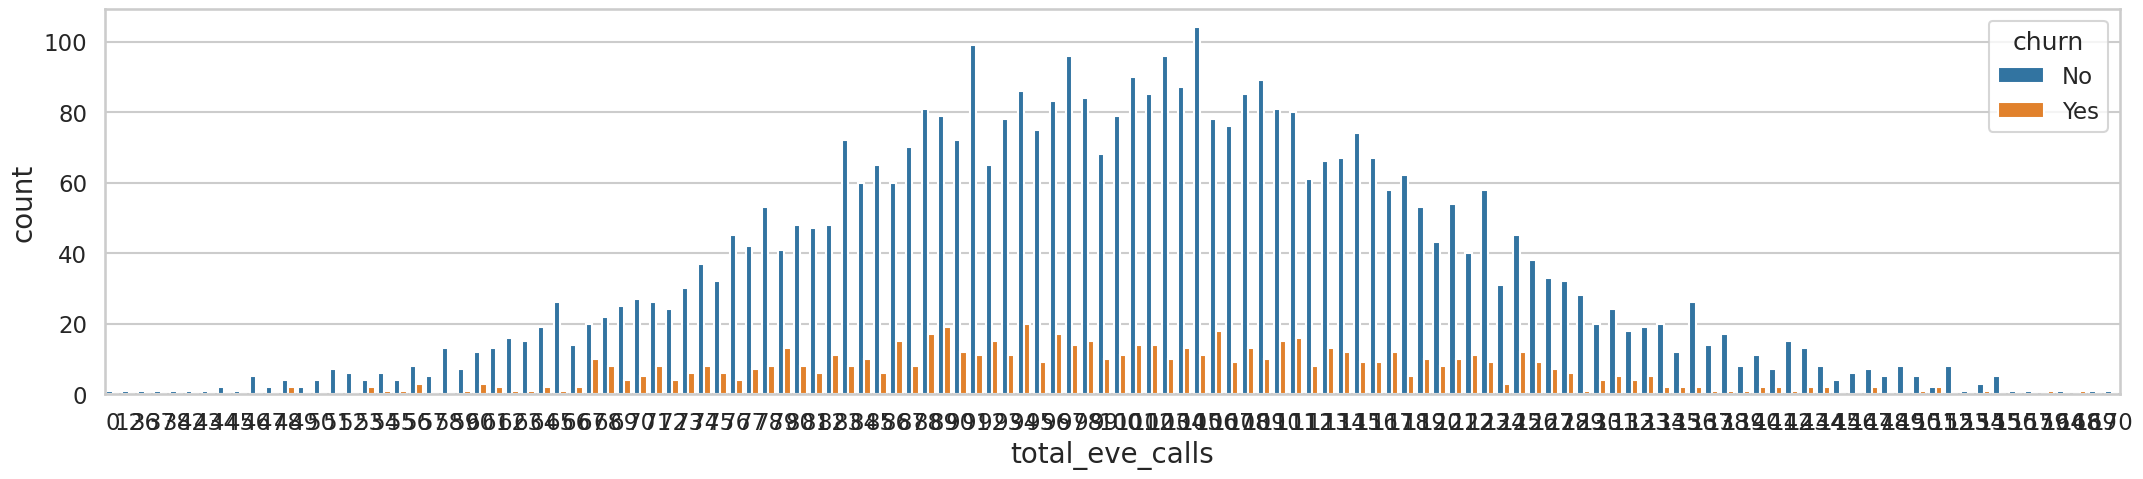

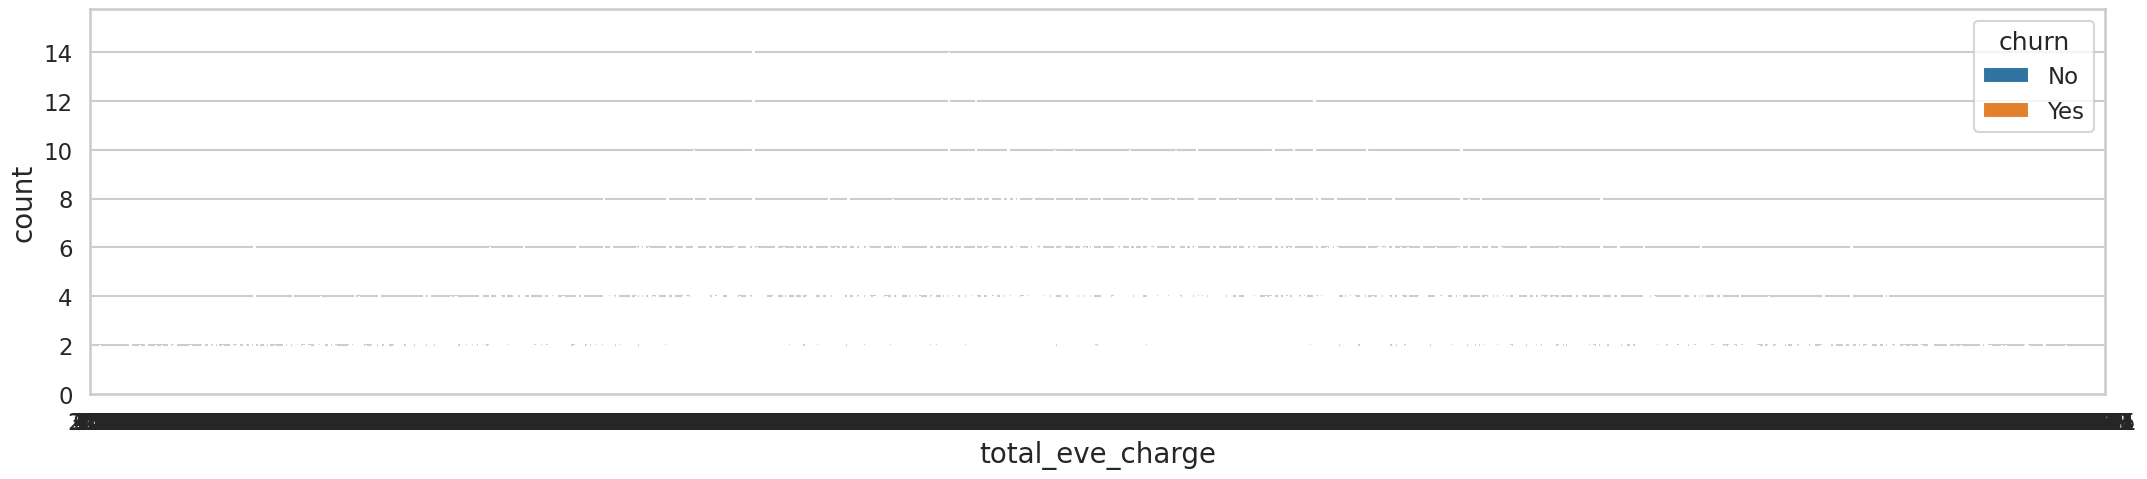

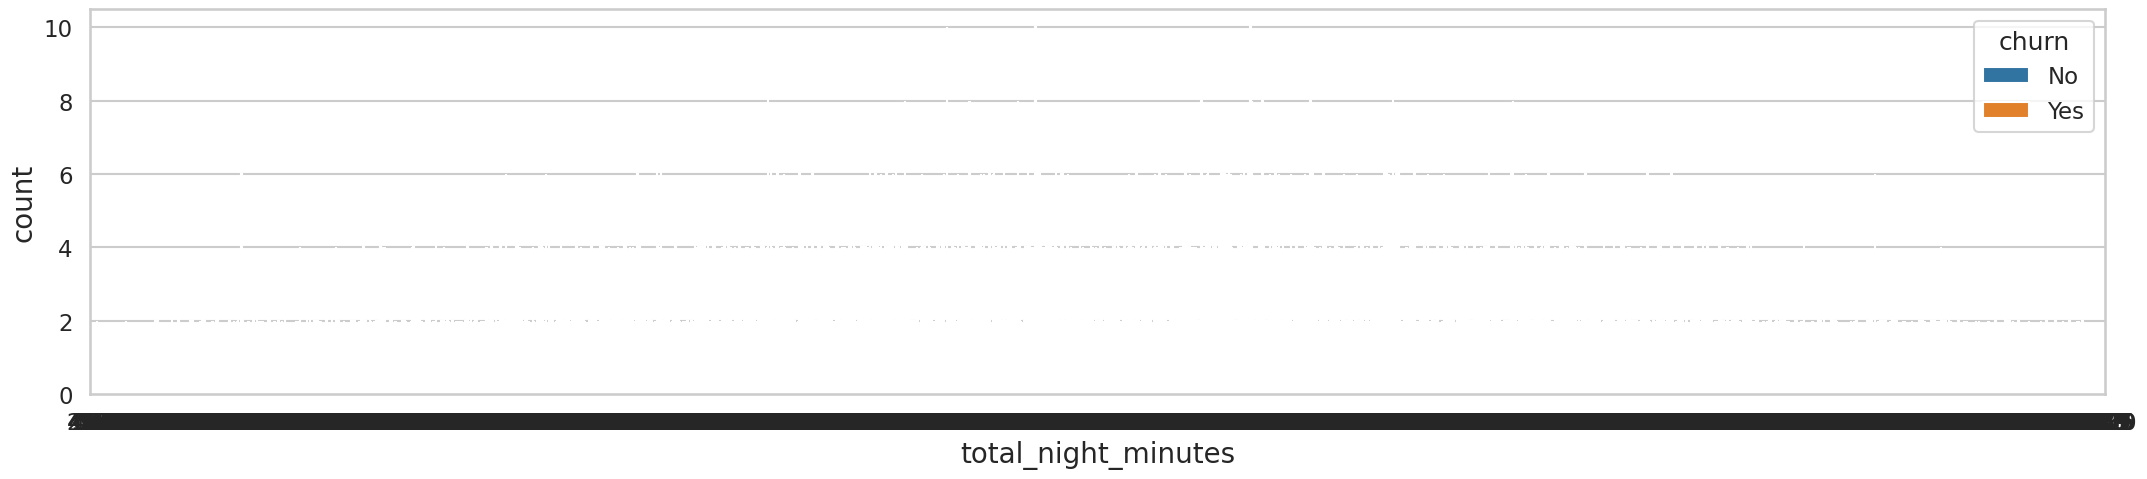

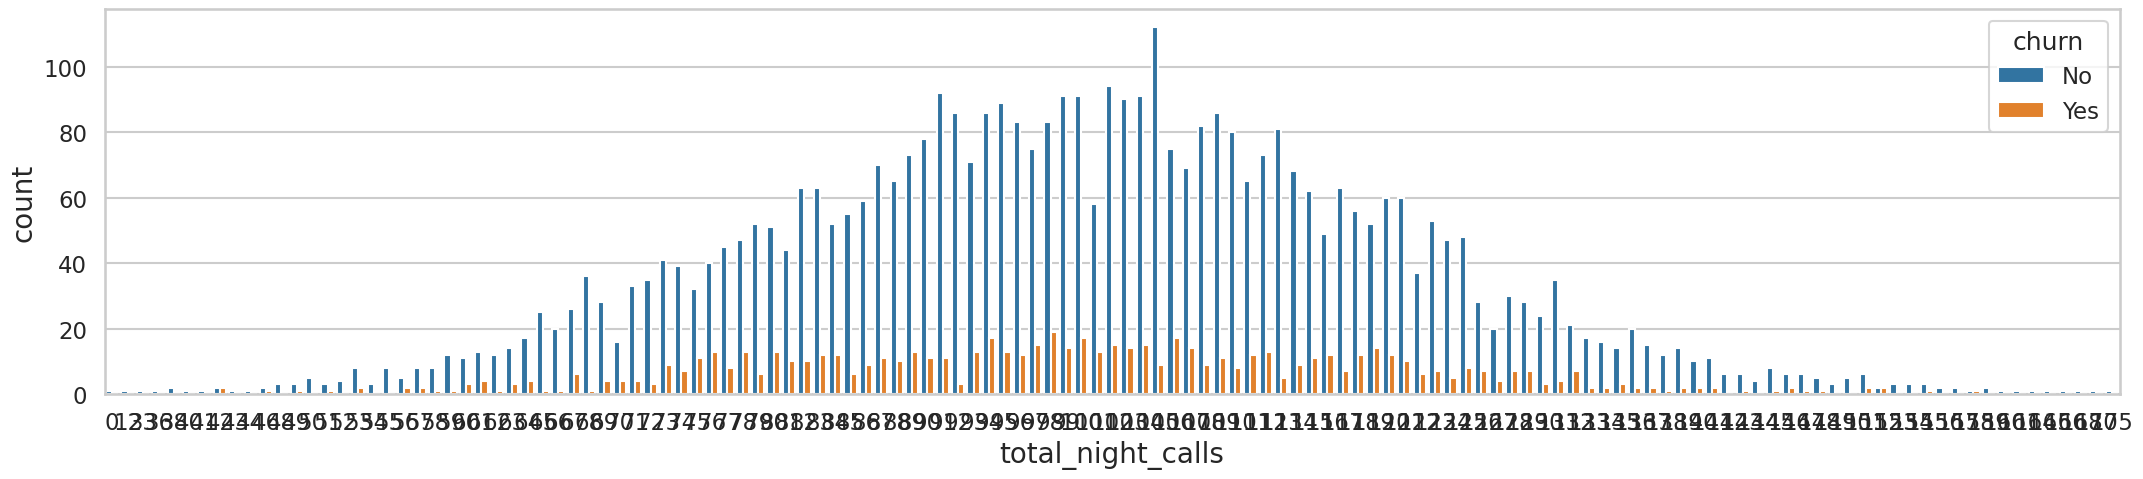

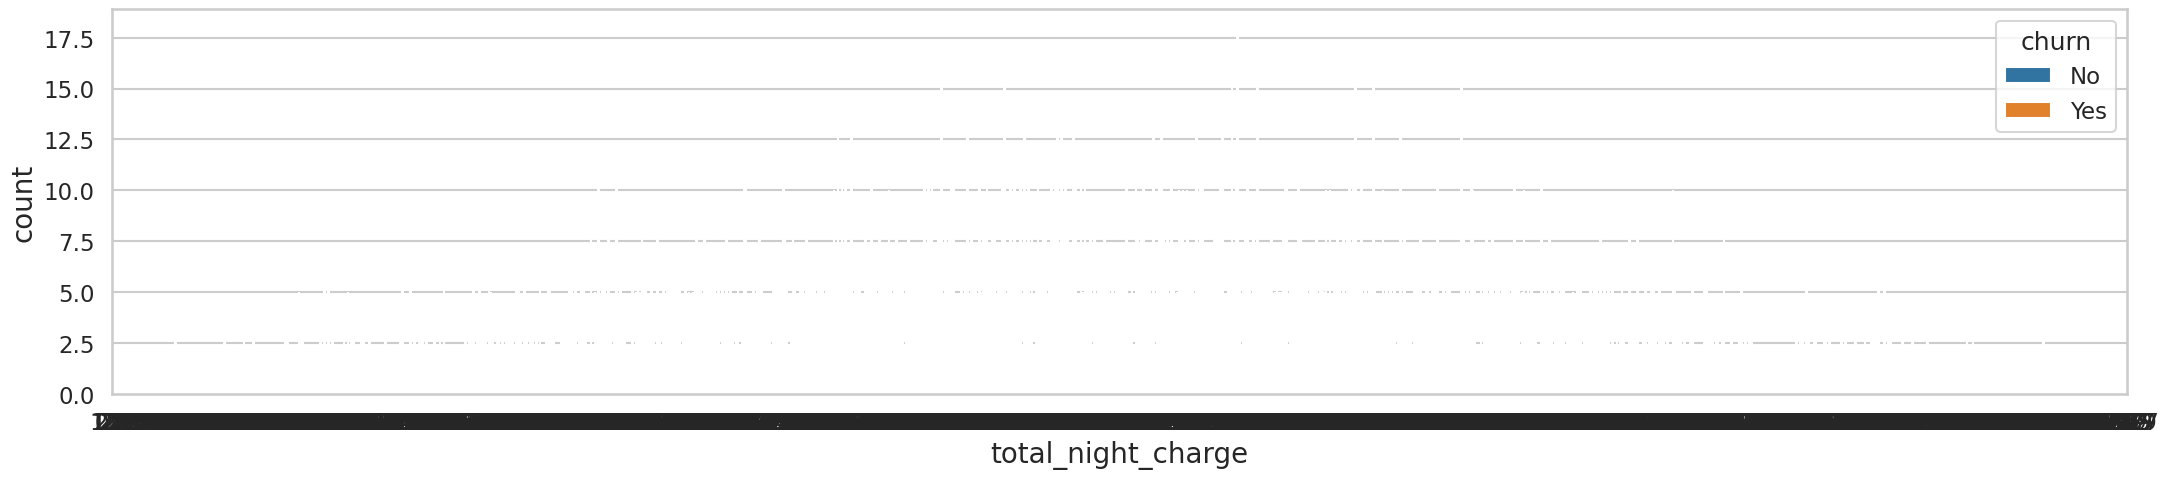

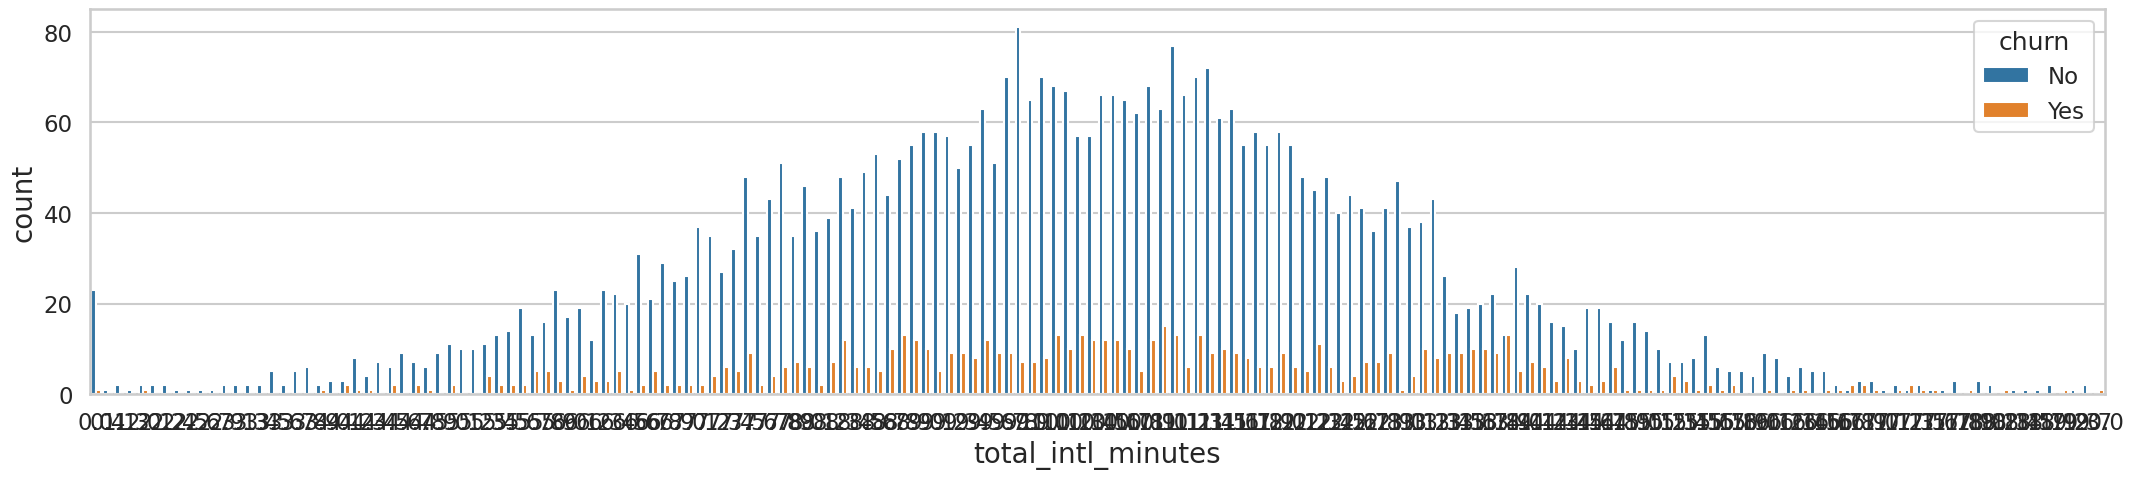

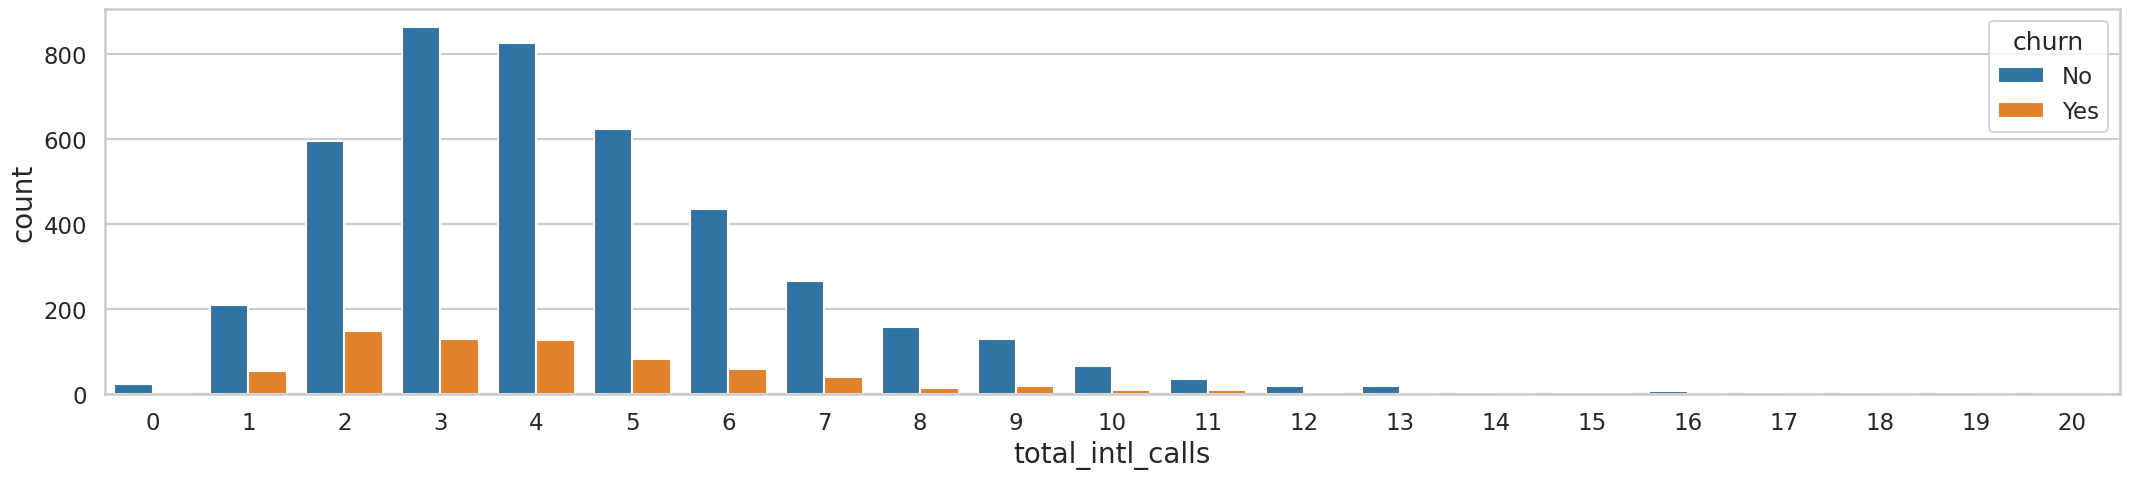

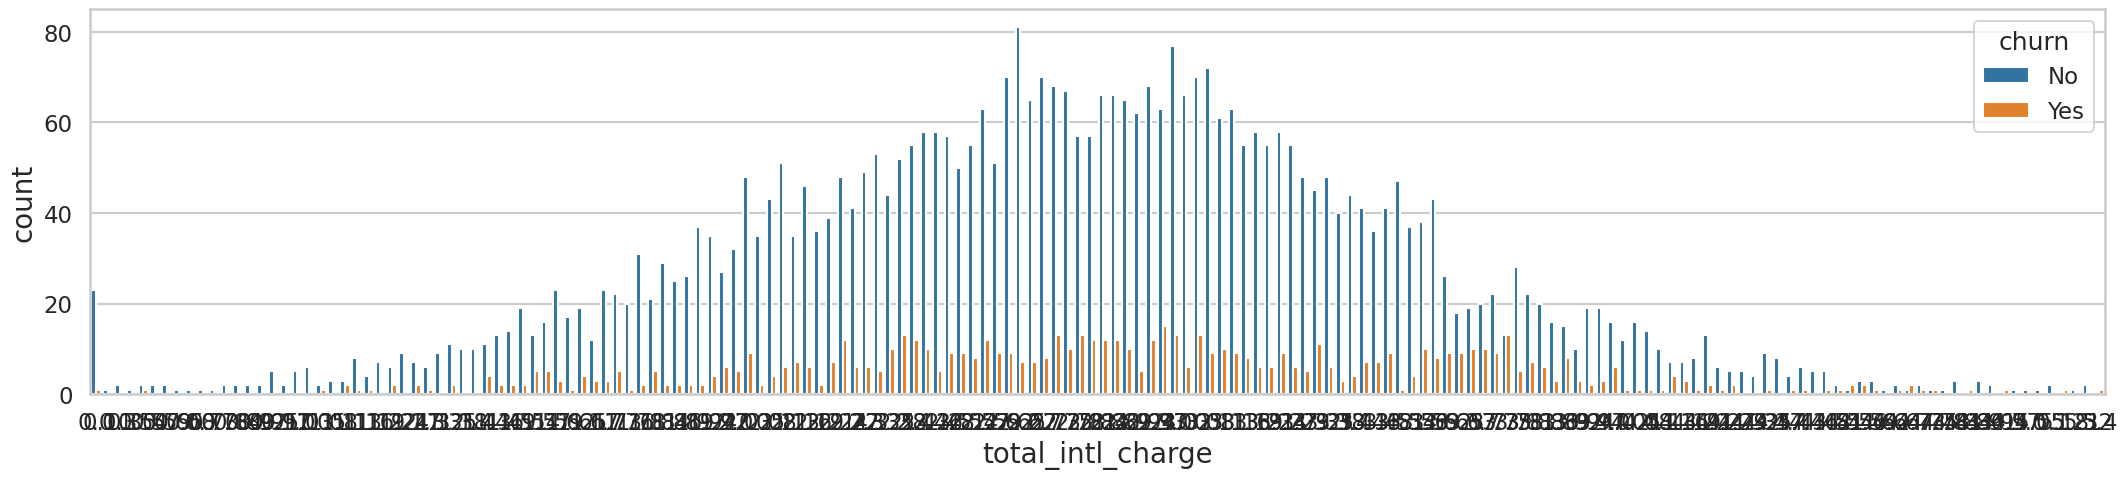

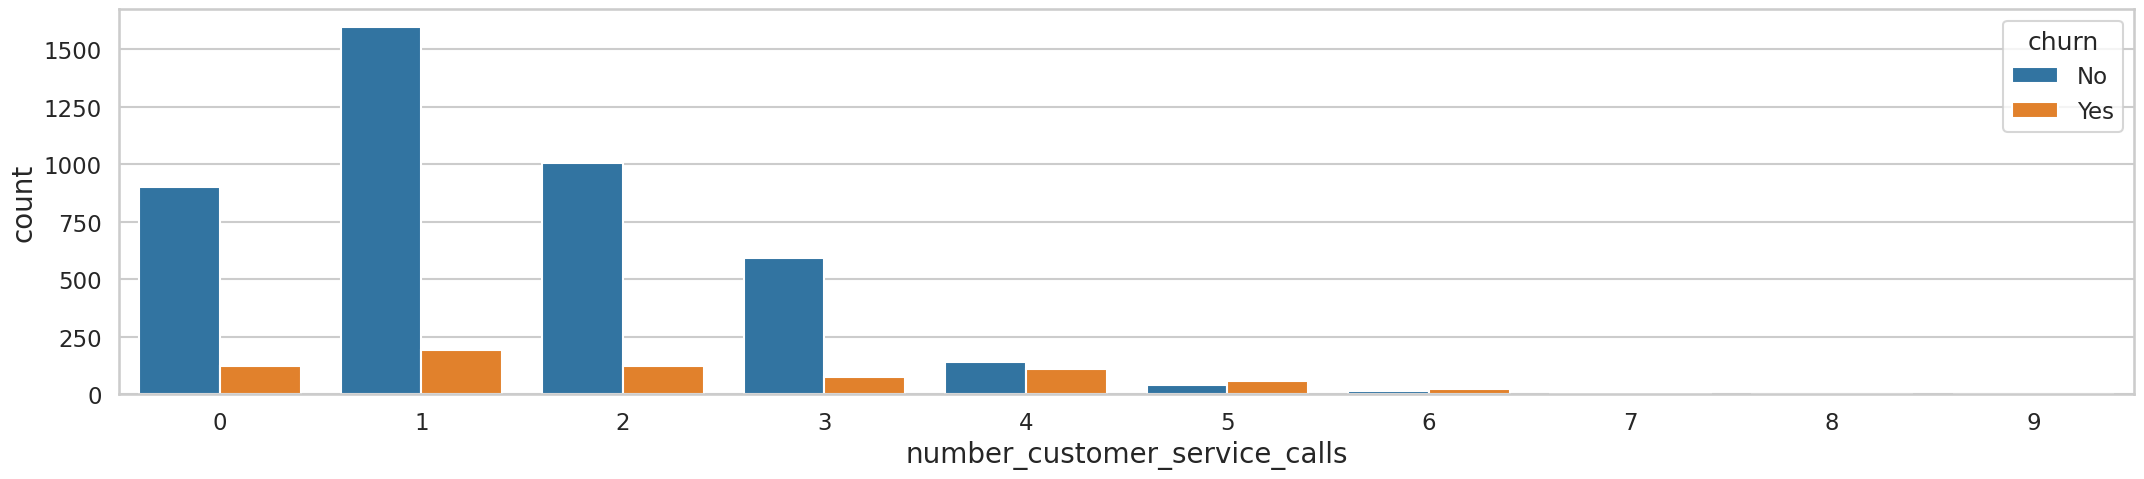

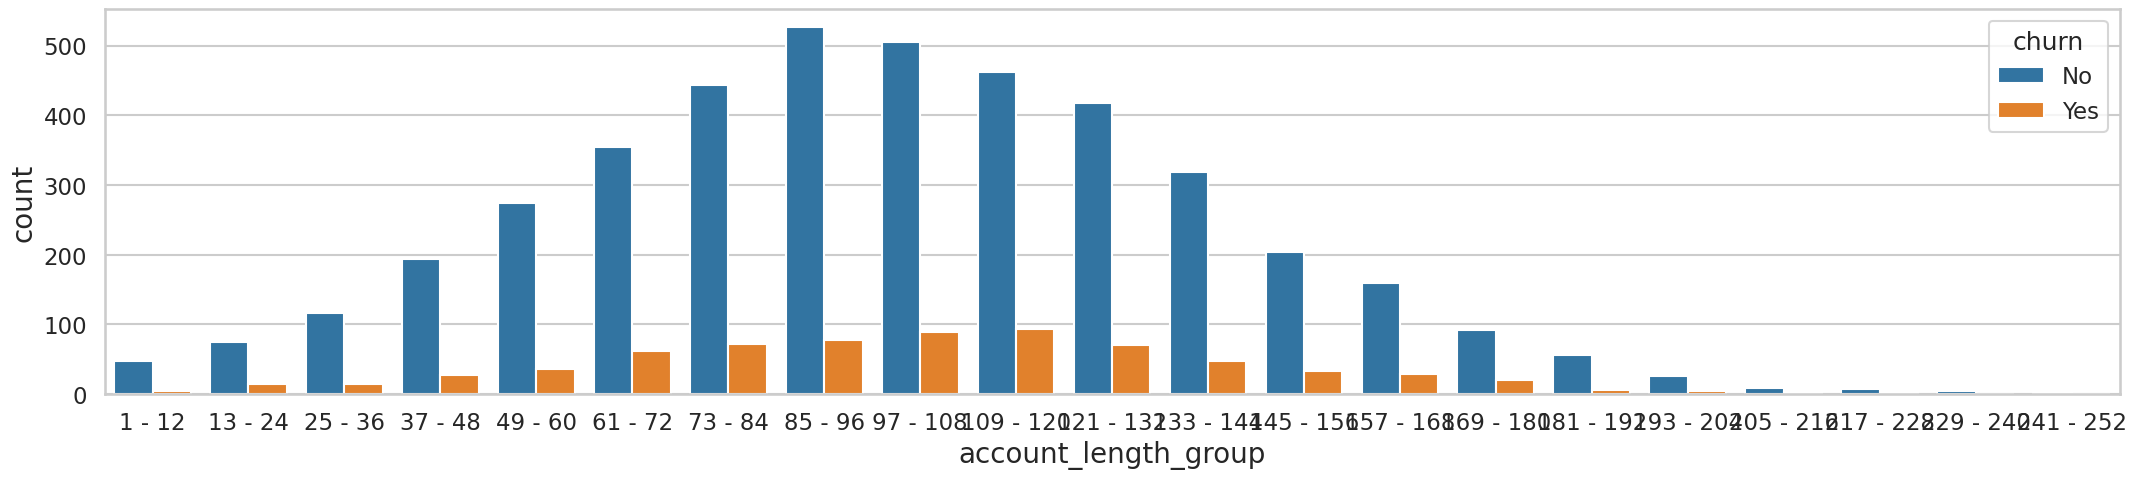

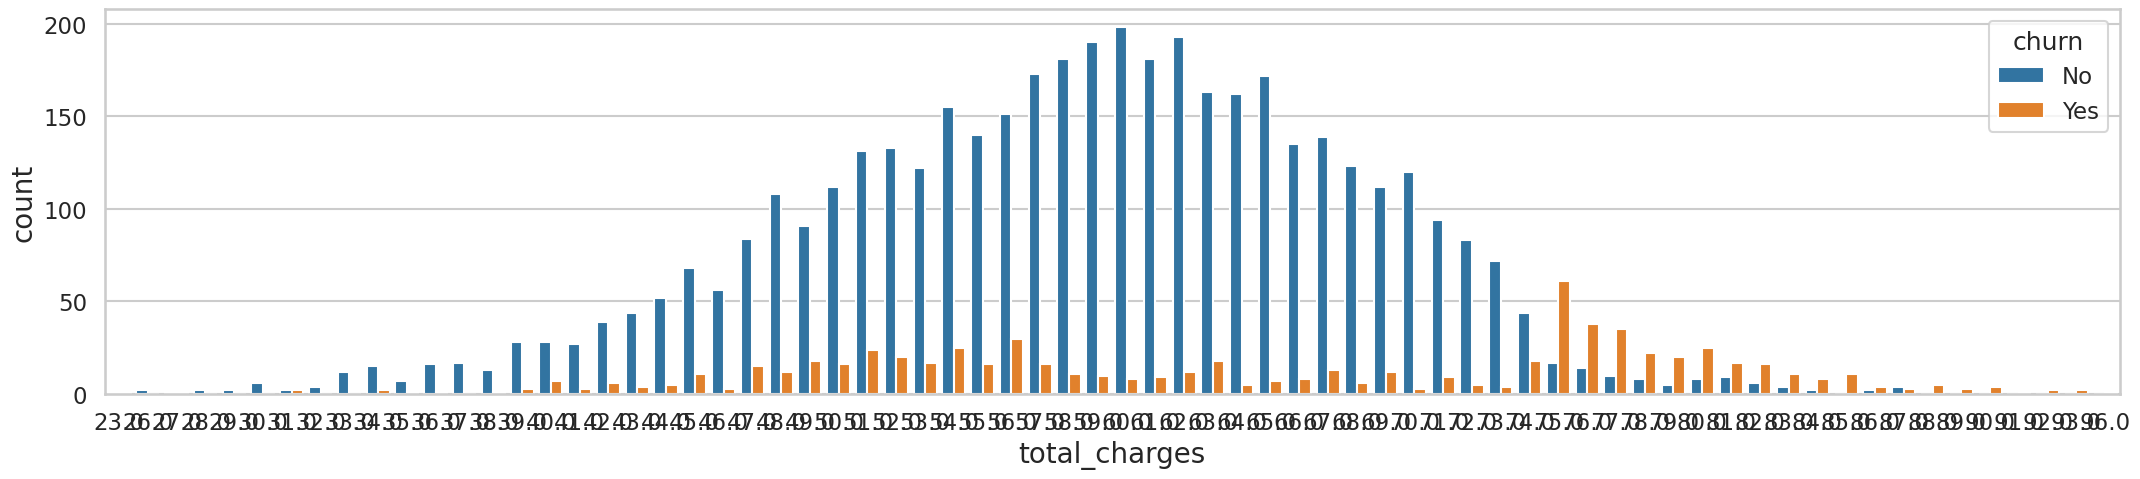

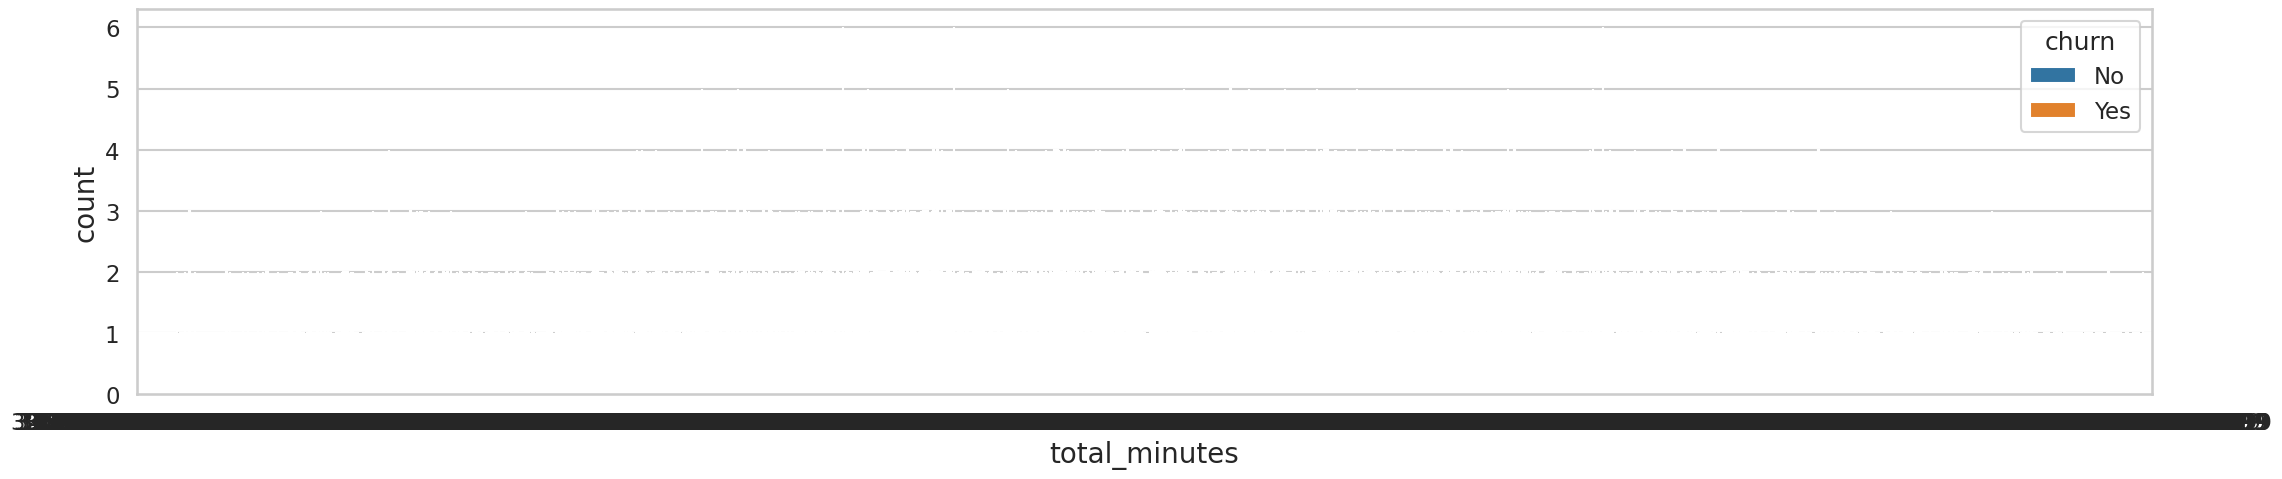

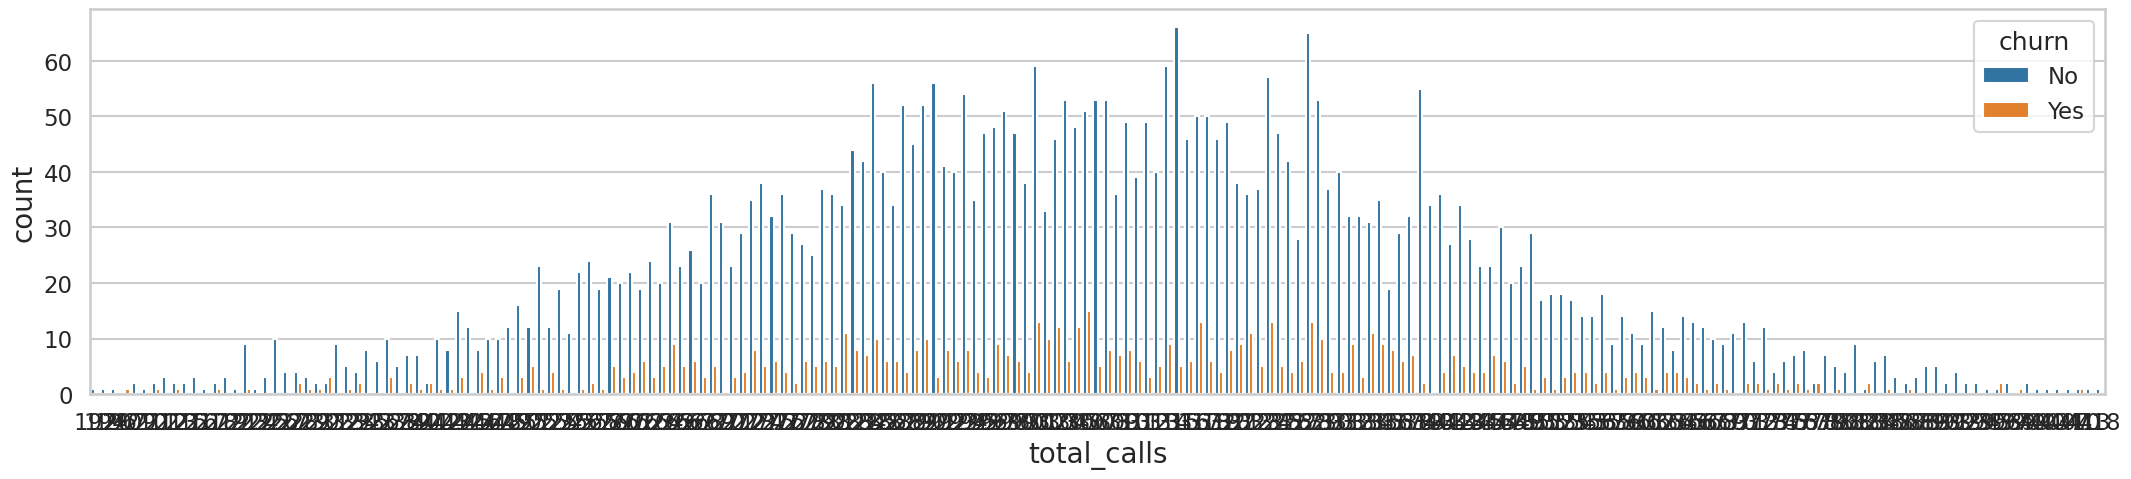

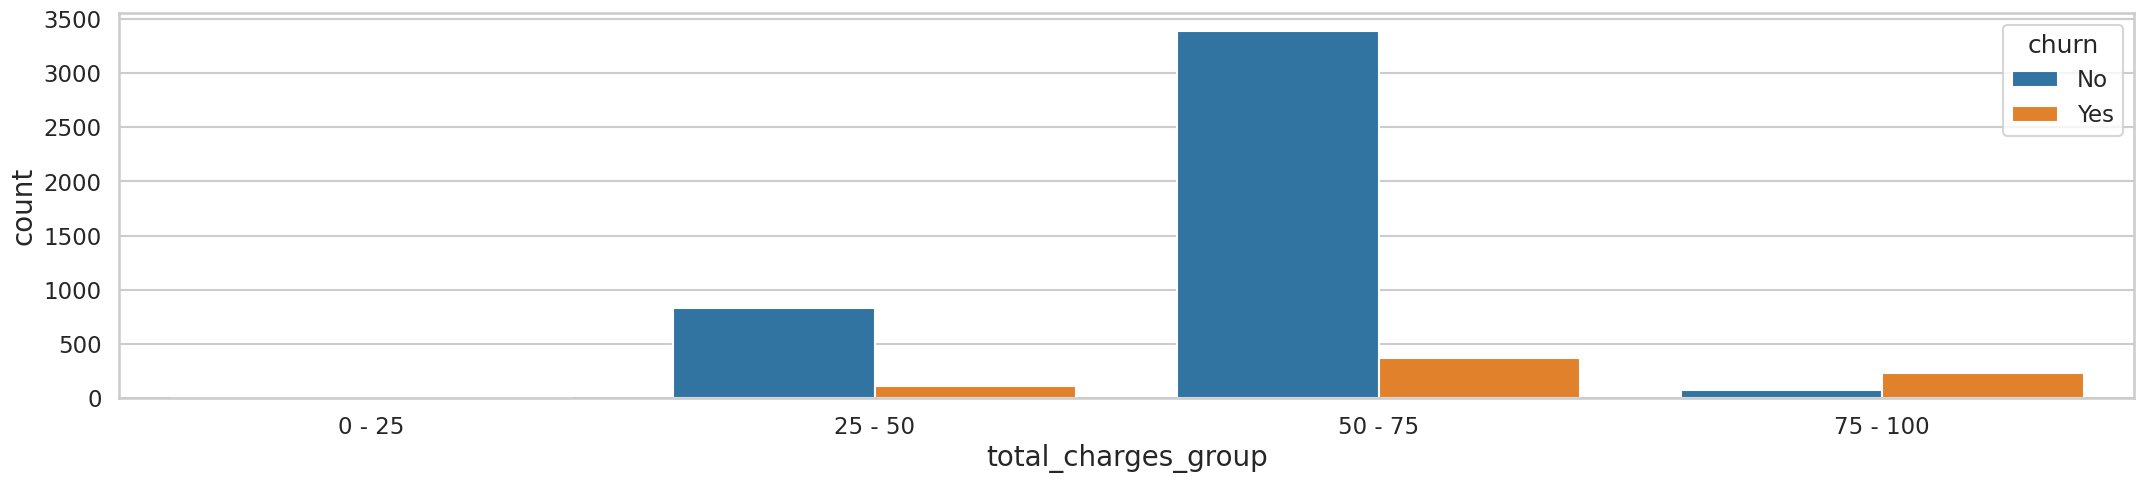

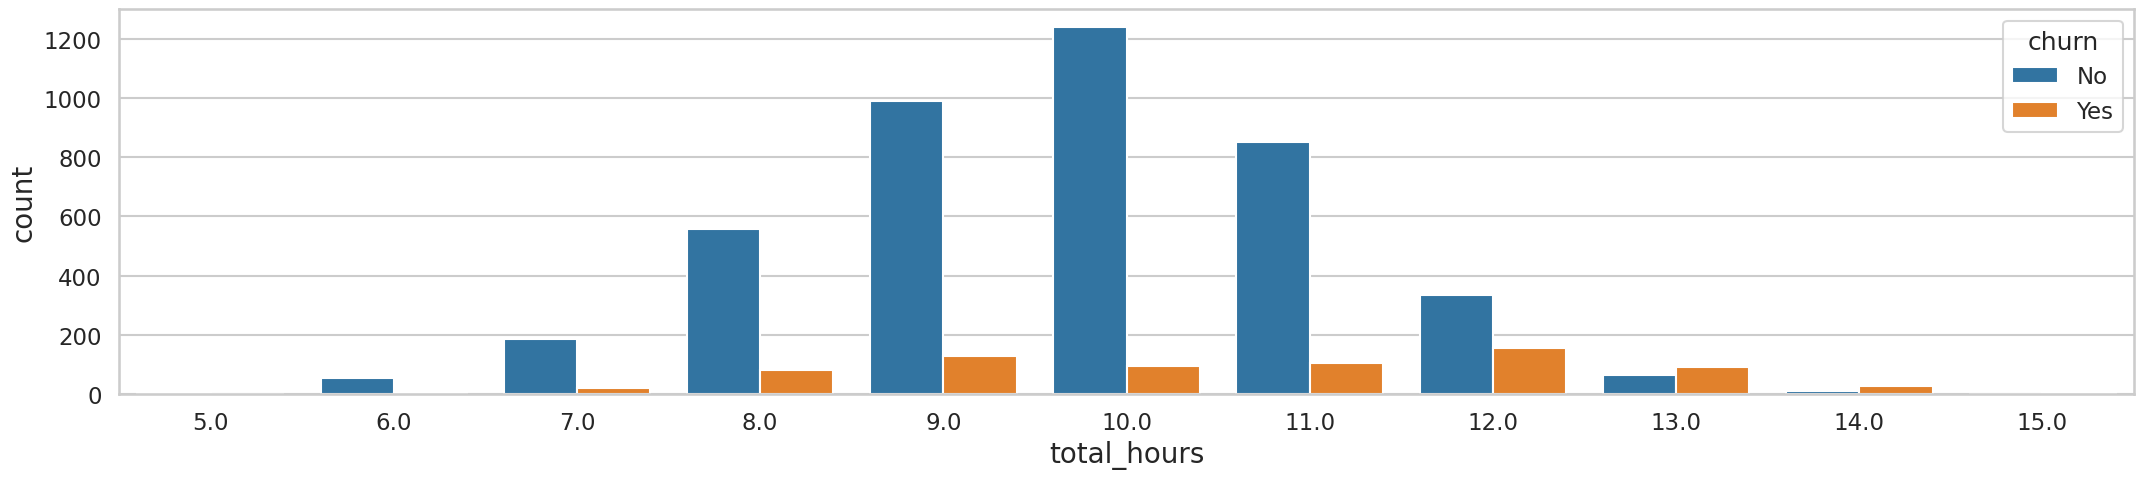

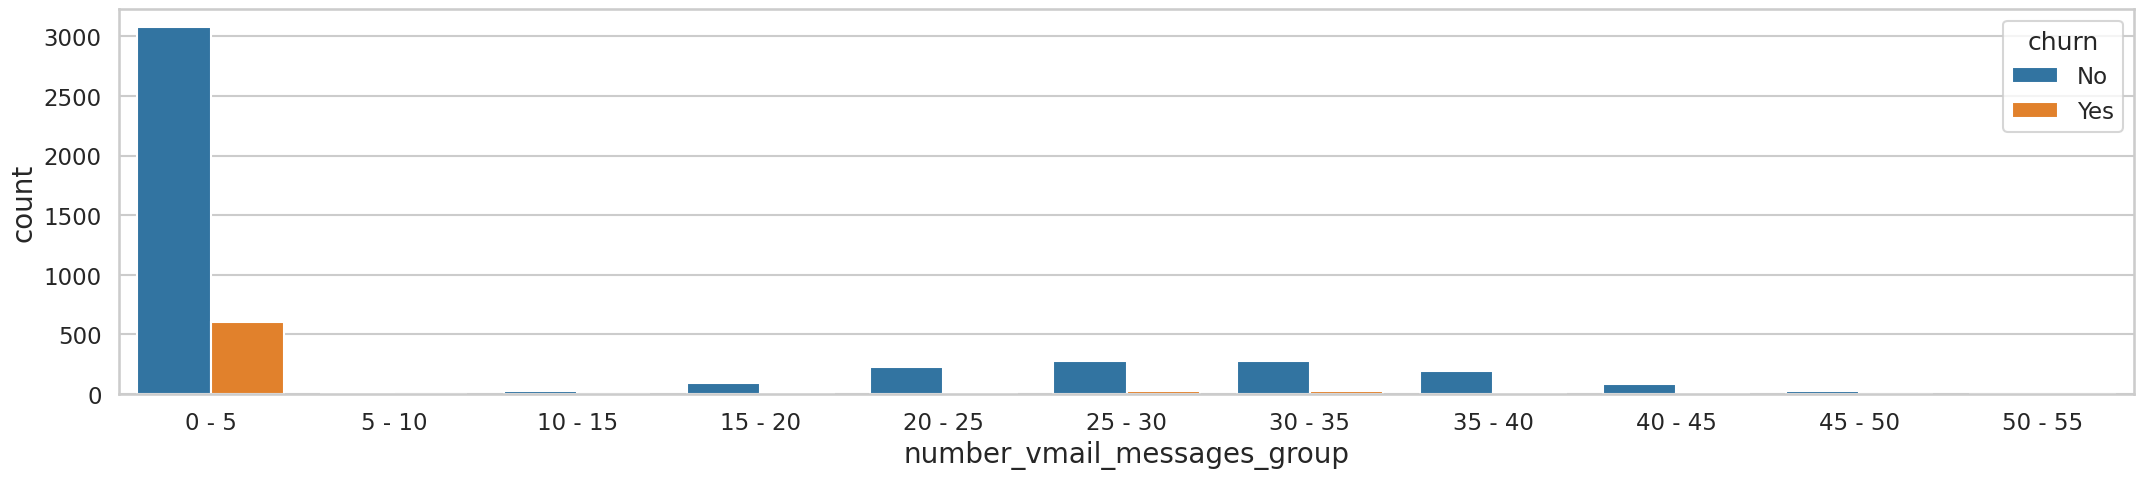

In [81]:
for i, predictor in enumerate(churn_data.drop(columns=['churn'])):
    plt.figure(i)
    plt.figure(figsize=(26, 5))
    sns.countplot(data=churn_data, x=predictor, hue='churn')

**Patterns from Visualizations**


| **Highest Churners Pattern** |        **Description**       |
|:----------------------------:|:----------------------------:|
| Internation Plan             | Opted for plan               |
| Voicemail Plan               | Not opted for plan           |
| Total Charges                | Pays more than +75($) Doller |


**Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes = 1 No = 0**

In [85]:
churn_data['churn'] = np.where(churn_data.churn == 'Yes',1,0)
churn_data['international_plan'] = np.where(churn_data.international_plan == 'Yes',1,0)
churn_data['voicemail_plan'] = np.where(churn_data.voicemail_plan == 'Yes',1,0)

In [86]:
churn_data.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length_group,total_charges,total_minutes,total_calls,total_charges_group,total_hours,number_vmail_messages_group
0,0,128,0,0,25,265.1,110,45.07,197.4,99,...,3,2.70,1,121 - 132,76.0,717.2,304,75 - 100,12.0,25 - 30
1,0,107,0,0,26,161.6,123,27.47,195.5,103,...,3,3.70,1,97 - 108,59.0,625.2,333,50 - 75,10.0,25 - 30
2,0,137,0,0,0,243.4,114,41.38,121.2,110,...,5,3.29,0,133 - 144,62.0,539.4,333,50 - 75,9.0,0 - 5
3,0,84,0,0,0,299.4,71,50.90,61.9,88,...,7,1.78,2,73 - 84,67.0,564.8,257,50 - 75,9.0,0 - 5
4,0,75,0,0,0,166.7,113,28.34,148.3,122,...,3,2.73,3,73 - 84,52.0,512.0,362,50 - 75,9.0,0 - 5


**Convert all the categorical variables into dummy variables**


In [87]:
churn_data_dummies = pd.get_dummies(churn_data)
churn_data_dummies.head()

,churn,account_length,international_plan,voicemail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,number_vmail_messages_group_5 - 10,number_vmail_messages_group_10 - 15,number_vmail_messages_group_15 - 20,number_vmail_messages_group_20 - 25,number_vmail_messages_group_25 - 30,number_vmail_messages_group_30 - 35,number_vmail_messages_group_35 - 40,number_vmail_messages_group_40 - 45,number_vmail_messages_group_45 - 50,number_vmail_messages_group_50 - 55
0,0,128,0,0,25,265.1,110,45.07,197.4,99,...,0,0,0,0,1,0,0,0,0,0
1,0,107,0,0,26,161.6,123,27.47,195.5,103,...,0,0,0,0,1,0,0,0,0,0
2,0,137,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,0,84,0,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,0,75,0,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


**Relationship between features**



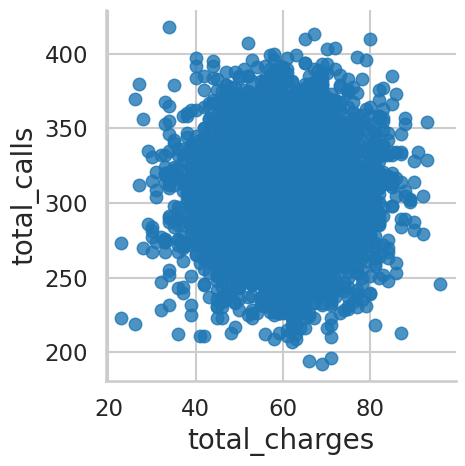

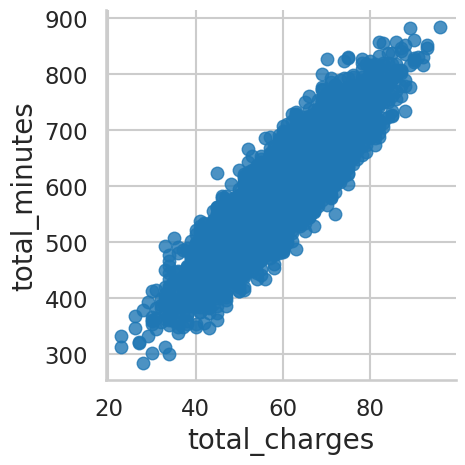

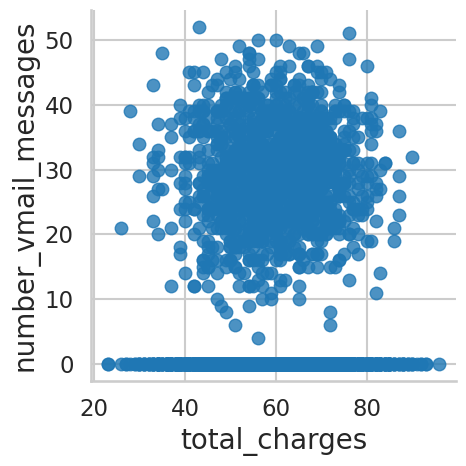

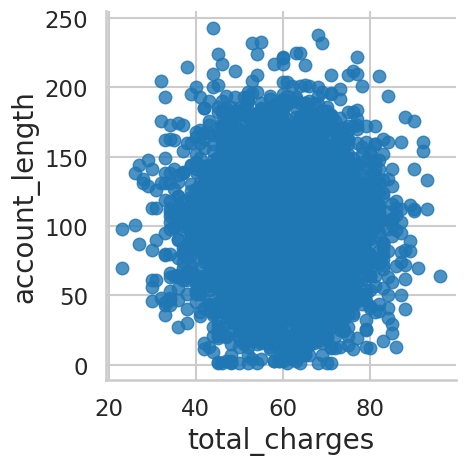

In [88]:
sns.lmplot(data=churn_data_dummies, x='total_charges', y='total_calls', fit_reg=False)
sns.lmplot(data=churn_data_dummies, x='total_charges', y='total_minutes', fit_reg=False)
sns.lmplot(data=churn_data_dummies, x='total_charges', y='number_vmail_messages', fit_reg=False)
sns.lmplot(data=churn_data_dummies, x='total_charges', y='account_length', fit_reg=False)

*   Total charges has no effect as total calls and number of voice mail messages increaes, thus this feature is of not much of use
*   Total charges increases as total calling minutes increases:
*   Account length is not directly proportional to Total Charges

**Churn by Total Minutes and Total Charges**

<ipython-input-89-8a74f2edba87>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(churn_data_dummies.total_charges[(churn_data_dummies["churn"] == 0) ], color="Red", shade = True)
<ipython-input-89-8a74f2edba87>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(churn_data_dummies.total_charges[(churn_data_dummies["churn"] == 1) ], ax=Mth, color="Blue", shade= True)


Text(0.5, 1.0, 'Total charges by churn')

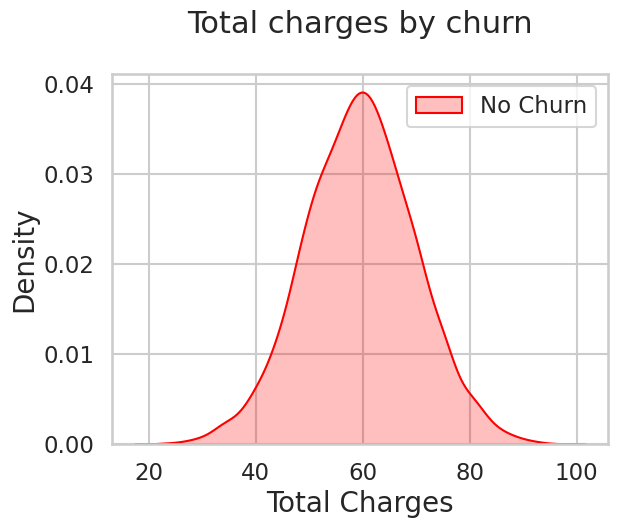

In [89]:
Mth = sns.kdeplot(churn_data_dummies.total_charges[(churn_data_dummies["churn"] == 0) ], color="Red", shade = True)
Mth = sns.kdeplot(churn_data_dummies.total_charges[(churn_data_dummies["churn"] == 1) ], ax=Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

**Insight:** Churn is high when Total Charges are high

<ipython-input-90-3ed716228f79>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_data_dummies.total_minutes[(churn_data_dummies["churn"] == 0) ], color="Red", shade = True)
<ipython-input-90-3ed716228f79>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_data_dummies.total_minutes[(churn_data_dummies["churn"] == 1) ], ax =Tot, color="Blue", shade= True)


Text(0.5, 1.0, 'Total Minutes by churn')

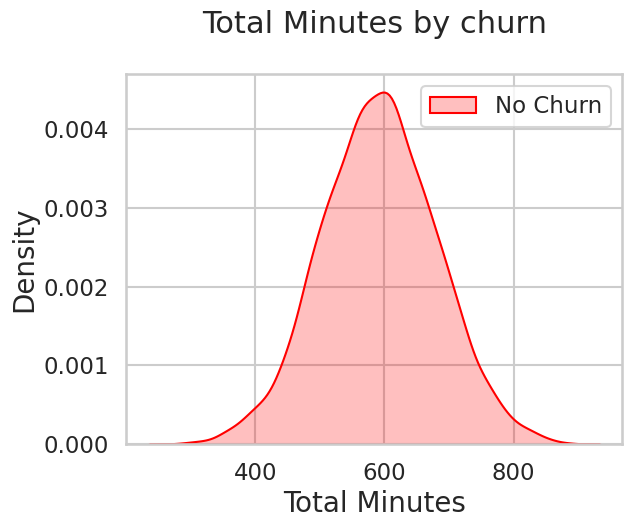

In [90]:
Tot = sns.kdeplot(churn_data_dummies.total_minutes[(churn_data_dummies["churn"] == 0) ], color="Red", shade = True)
Tot = sns.kdeplot(churn_data_dummies.total_minutes[(churn_data_dummies["churn"] == 1) ], ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Minutes')
Tot.set_title('Total Minutes by churn')

**Insight:** Churn is high when Total Munites are high

<ipython-input-91-df020b45eae2>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_data_dummies.total_calls[(churn_data_dummies["churn"] == 0) ], color="Red", shade = True)
<ipython-input-91-df020b45eae2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_data_dummies.total_calls[(churn_data_dummies["churn"] == 1) ], ax =Tot, color="Blue", shade= True)


Text(0.5, 1.0, 'Total Calls by churn')

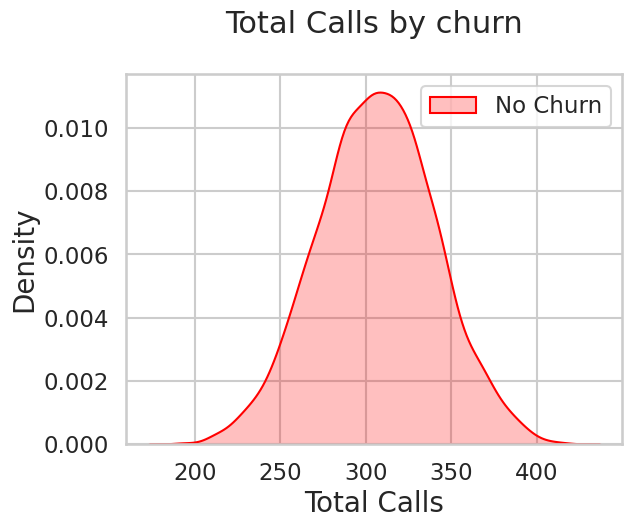

In [91]:
Tot = sns.kdeplot(churn_data_dummies.total_calls[(churn_data_dummies["churn"] == 0) ], color="Red", shade = True)
Tot = sns.kdeplot(churn_data_dummies.total_calls[(churn_data_dummies["churn"] == 1) ], ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Calls')
Tot.set_title('Total Calls by churn')

**Insight:** Churn has no relation with Total Calls

**Significant Insights**

Features about calls and messages has no direct relation to churn of customer.
However, if we combine the insights of 3 to 4 parameters i.e. Internation Plan, Voicemail Plan, Total Charges and Total Minutes then the picture is bit clear :- Higher Total Charge with Internation Plan activated spending higher calling minutes results into higher churner rate. Hence, all these 4 factors viz **Higher Total Charge**,  **Longer Call Minutes**, **Internation Plan** and **Voicemail Plan** are linkd to **High Churn**.

**Build a corelation of all predictors with 'Churn'**

<Axes: >

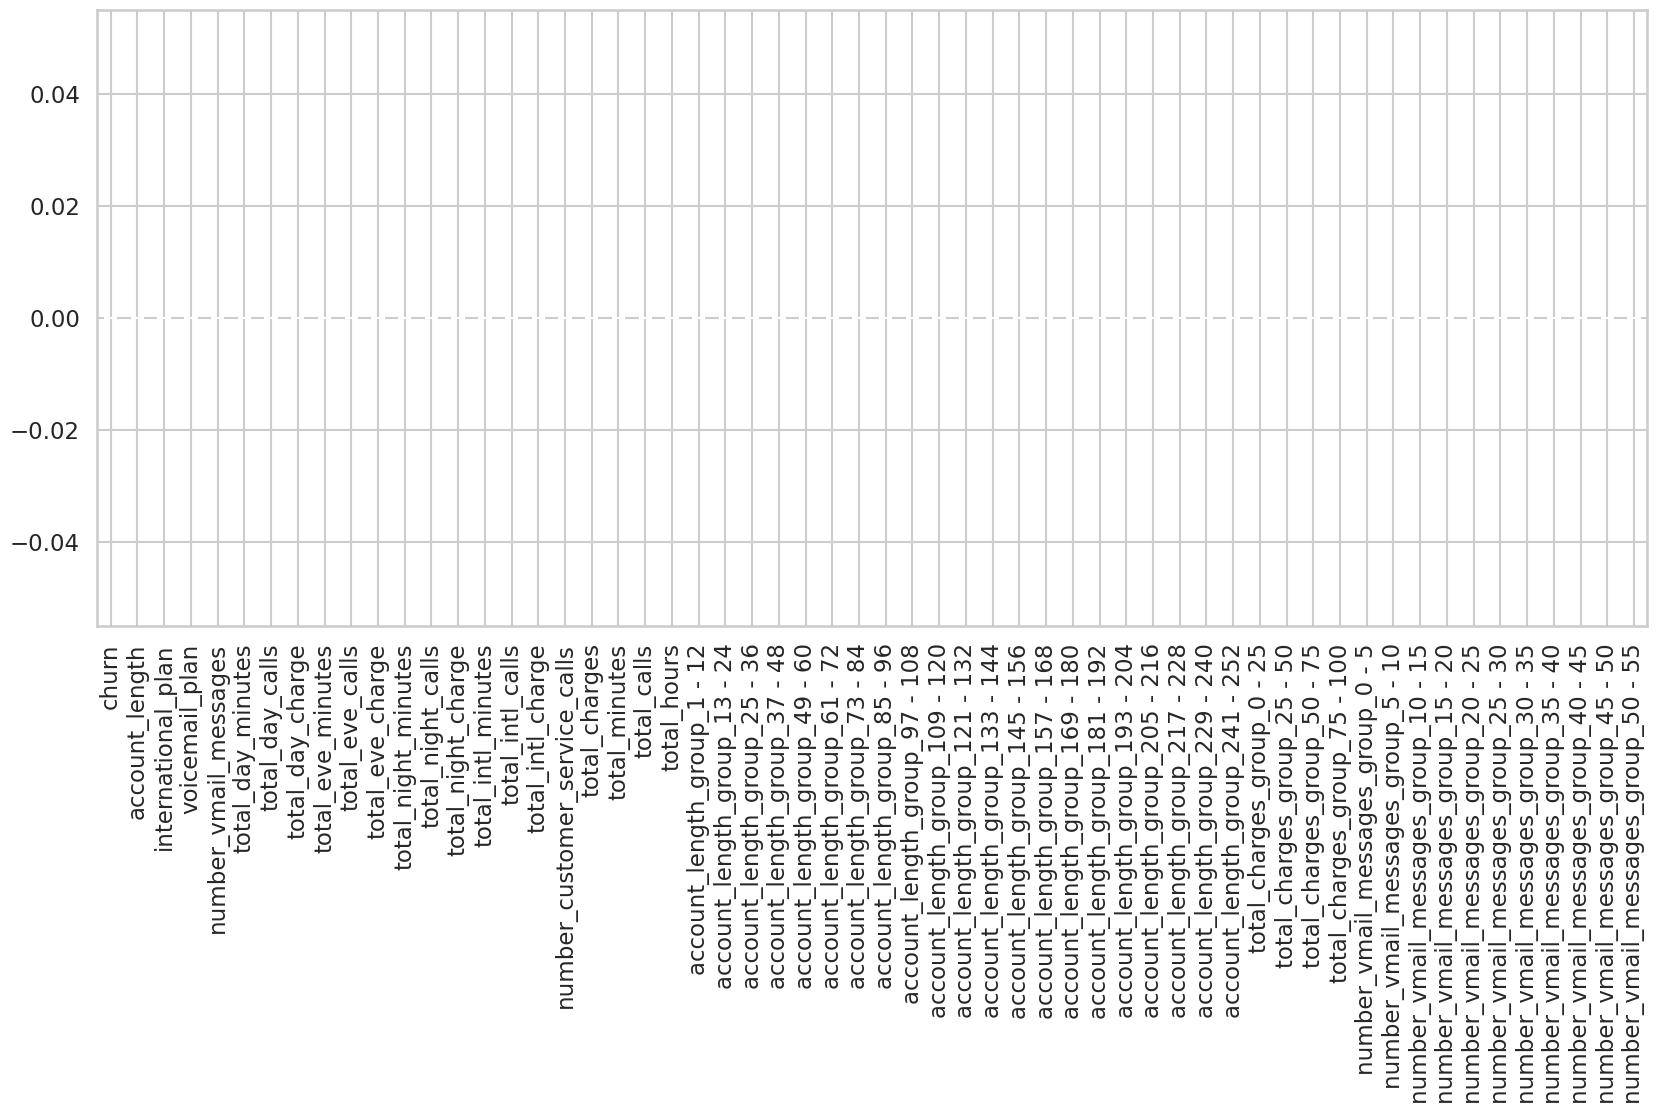

In [92]:
plt.figure(figsize=(20,8))
churn_data_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

**HIGH** Churn seen in case of  **Total Charges +75$**, **Total Minutes**

**LOW** Churn is seens in case of **Internation Plan**, **Subscriptions without Voice Mail Service**. However, visualization shown above with given plan helps to understand churn pattern.

Factors like **Account Length** and **Total Calls** have alomost **NO** impact on Churn

This is also can be seen from the **Heatmap** beneath

<Axes: >

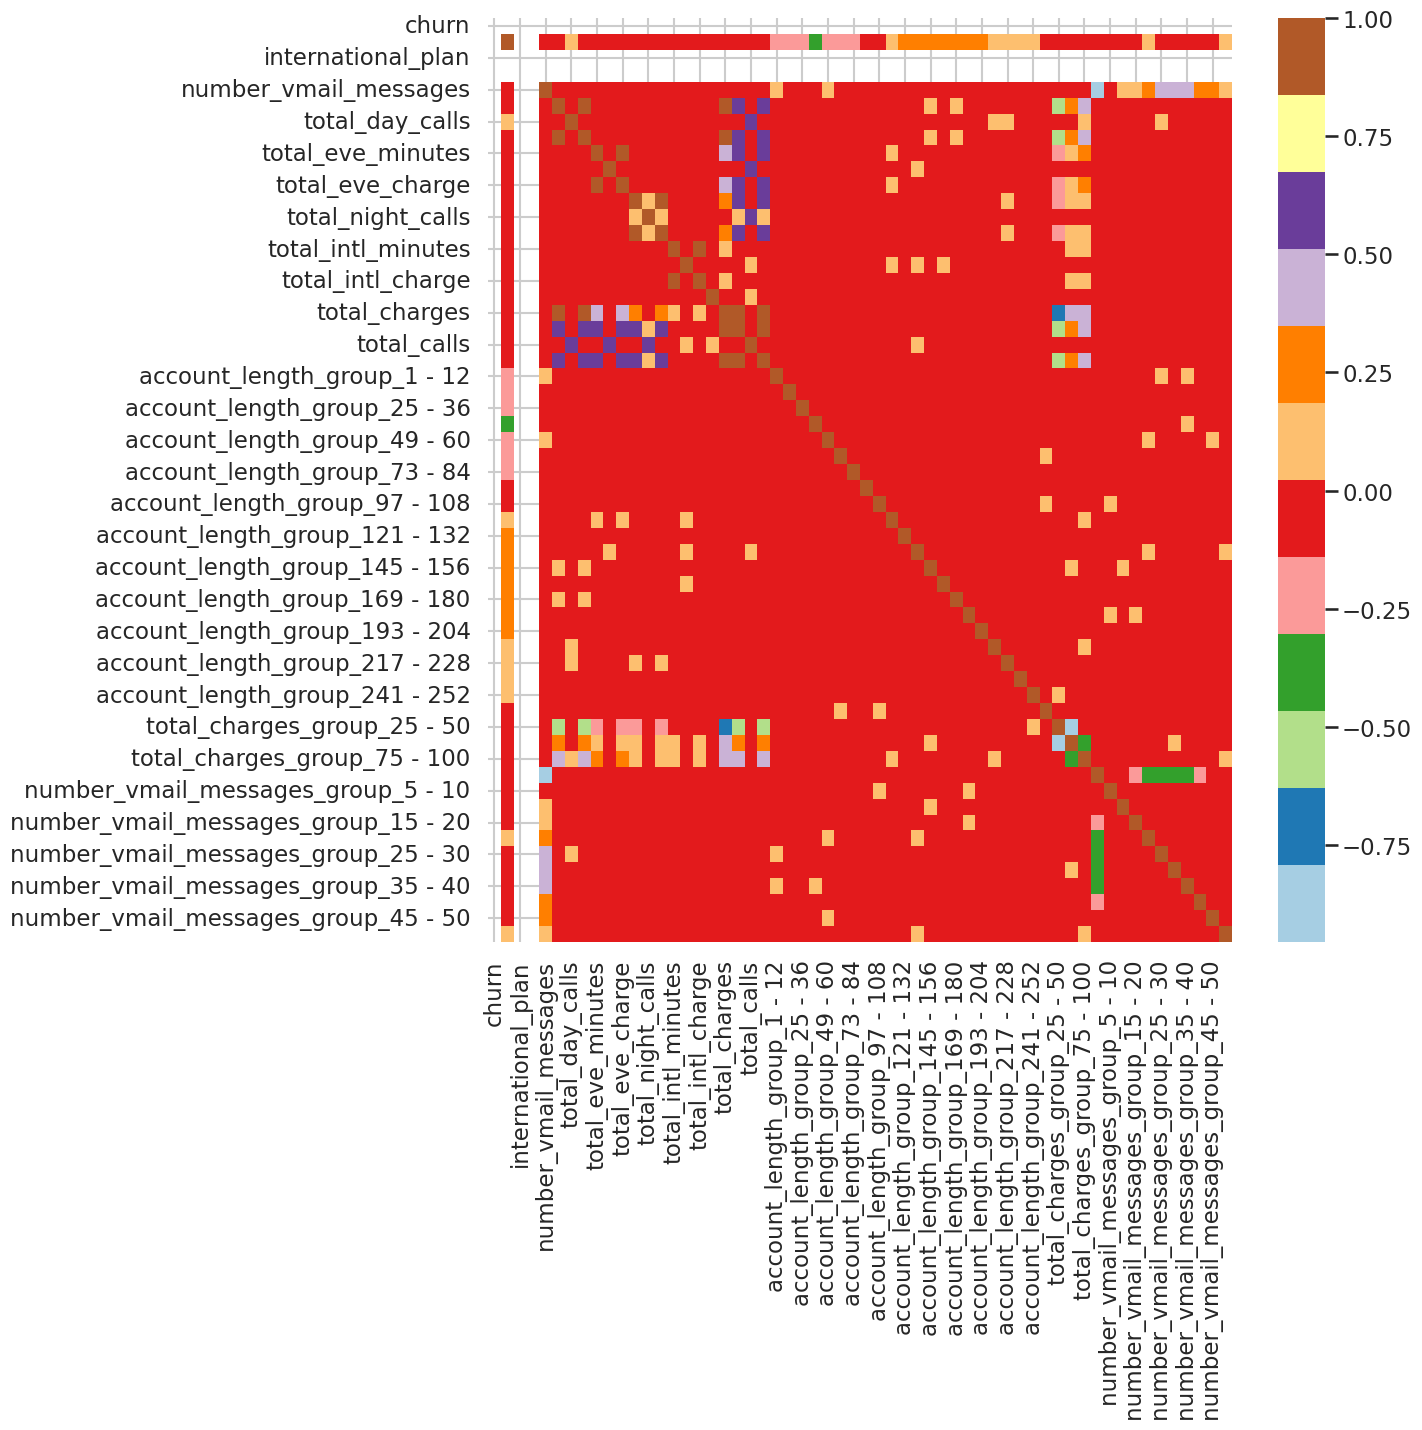

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(churn_data_dummies.corr(), cmap="Paired")



---



# CONCLUSION

**Higher Churn**: Customers who spend more than $75 in Total Charges and use a significant number of Total Minutes are more likely to leave the service. It seems that higher expenses and increased usage contribute to a higher risk of churning.

**Lower Churn**: Customers who subscribe to the International Plan and don't use Voice Mail Service tend to stay with the service. Offering an International Plan and ensuring Voice Mail availability may help retain customers and reduce churn.

**Visualization Insights**: The charts and graphs provided offer valuable insights into churn patterns. Visual representations help us see trends and patterns that may not be immediately obvious from the raw data.

**Factors with Little Impact**: Account Length (how long a customer has been with the service) and Total Calls don't seem to have a significant impact on customer churn. They don't strongly predict whether a customer will leave or not.

**In conclusion**, understanding the impact of Total Charges and Total Minutes can help predict churn, while catering to customers with specific plans and services like the International Plan and Voice Mail can boost customer retention. The visualizations provided are valuable for spotting trends. Account Length and Total Calls might not be as critical for predicting churn in the current analysis. This knowledge can guide strategies to reduce churn and improve overall customer retention.

In [94]:
churn_data_dummies.to_csv('eda_churn.csv')